# Metadata

https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

ข้อมูลเกี่ยวกับ คะแนนสอบของนักเรียนจากการเก็บตัวอย่างจากโรงเรียนแห่งหนึ่ง โดยมีปัจจัยหลายอย่าง ดังนี้   
 1. Hours_Studied - จำนวนชั่วโมงที่ใช้ในการเรียนต่อสัปดาห์
 2. Attendance - เปอร์เซ็นต์ของการเข้าชั้นเรียน
 3. Parental_Involvement - ระดับการมีส่วนร่วมของผู้ปกครองในด้านการศึกษา (ต่ำ, ปานกลาง, สูง)
 4. Access_to_Resources - ความพร้อมของทรัพยากรทางการศึกษา (ต่ำ, ปานกลาง, สูง)
 5. Extracurricular_Activities - การเข้าร่วมกิจกรรมนอกหลักสูตร (ใช่, ไม่ใช่)
 6. Sleep_Hours - จำนวนชั่วโมงการนอนเฉลี่ยต่อคืน
 7. Previous_Scores - คะแนนจากการสอบครั้งก่อนหน้า
 8. Motivation_Level - ระดับแรงจูงใจของนักเรียน (ต่ำ, ปานกลาง, สูง)
 9. Internet_Access - ความพร้อมของการเข้าถึงอินเทอร์เน็ต (ใช่, ไม่ใช่)
 10. Tutoring_Sessions - จำนวนการเรียนพิเศษที่เข้าร่วมต่อเดือน
 11. Family_Income - ระดับรายได้ของครอบครัว (ต่ำ, ปานกลาง, สูง)
 12. Teacher_Quality - คุณภาพของครู (ต่ำ, ปานกลาง, สูง)
 13. School_Type - ประเภทของโรงเรียนที่เข้าเรียน (รัฐ, เอกชน)
 14. Peer_Influence - อิทธิพลของเพื่อนต่อการเรียน (บวก, เป็นกลาง, ลบ)
 15. Physical_Activity - จำนวนชั่วโมงกิจกรรมทางกายเฉลี่ยต่อสัปดาห์
 16. Learning_Disabilities - การมีความบกพร่องทางการเรียนรู้ (ใช่, ไม่ใช่)
 17. Parental_Education_Level - ระดับการศึกษาสูงสุดของผู้ปกครอง (มัธยม, วิทยาลัย, บัณฑิตศึกษา)
 18. Distance_from_Home - ระยะทางจากบ้านถึงโรงเรียน (ใกล้, ปานกลาง, ไกล)
 19. Gender - เพศของนักเรียน (ชาย, หญิง)
 20. Exam_Score - คะแนนสอบปลายภาค

ขนาดข้อมูล (641.95 kB) นามสกุลไฟล์ .csv   
มี 6607 แถว , 20 คอลัมน์  

Target คือ Exam_Score (ทำนายคะแนนสอบปลายภาคของนักเรียนแต่ละคน)

# Import
นำ Librarys กับ Data เข้ามา

**Import librarys**

In [134]:
#tools for data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#model and criteria 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,make_scorer,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, KFold , cross_val_score, GridSearchCV ,learning_curve , cross_validate

#tranformation
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder , OneHotEncoder , PolynomialFeatures 
from sklearn.pipeline import make_pipeline


In [135]:
import sklearn
import numpy
import sys

# ดูเวอร์ชันของ scikit-learn
print("scikit-learn version:", sklearn.__version__)

# ดูเวอร์ชันของ numpy
print("numpy version:", numpy.__version__)

# ดูเวอร์ชันของ Python
print("Python version:", sys.version)

scikit-learn version: 1.5.2
numpy version: 2.0.2
Python version: 3.9.20 (main, Oct  3 2024, 07:38:01) [MSC v.1929 64 bit (AMD64)]


!!! Version ที่ใช้ในการทำโปรเจค  
scikit-learn version: 1.5.2  
numpy version: 2.0.2  
Python version: 3.9.20 

**Import data**

In [136]:
data = pd.read_csv('https://raw.githubusercontent.com/Eieiz007/Datasets/refs/heads/main/StudentPerformanceFactors.csv')
data.columns = [x.split('(')[0].strip() for x in data.columns]
data.head(5)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [137]:
data.shape

(6607, 20)

# Data preparetion
ทำความสะอาดข้อมูลเบื้องต้น เพื่อนำไปเข้า model ให้มีประสิทธิภาพมากที่สุด

# 1.missing values

ลบข้อมูลที่ไม่มีค่าออก เช่น ค่าว่าง null หรือ values ที่ห้ามมีค่าเป็น 0

**null check**

In [138]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

พบข้อมูลที่มีค่าว่างอยู่     
Teacher_Quality	            78 แถว     
Parental_Education_Level	  90 แถว     
Distance_from_Home	        67 แถว  
แก้ปัญหาโดยการลบแถวออก


In [139]:
data = data.dropna()

In [140]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [141]:
data.shape

(6378, 20)

โดยสรุป missing_values มีทั้งหมด 235 แถวทำการลบออกทั้งหมด
จะเหลือจากเดิม 6607 เป็น 6378 แถว   
และไม่มี features ไหนที่ค่าห้ามเป็น 0 ทุก features สามารถมีค่าเป็น 0 ได้

# 2.data type check and categorical data transformation
เช็ค data type ว่าถูกต้องมั้ยและแปลงจาก categorical ให้คอมพิวเตอร์เข้าใจ 

**data type checks**

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

สำรวจ values แต่ละ features

In [143]:
for i in data.select_dtypes(include='object').columns:
  print(f'feature : {i} = {data[i].nunique()}')

feature : Parental_Involvement = 3
feature : Access_to_Resources = 3
feature : Extracurricular_Activities = 2
feature : Motivation_Level = 3
feature : Internet_Access = 2
feature : Family_Income = 3
feature : Teacher_Quality = 3
feature : School_Type = 2
feature : Peer_Influence = 3
feature : Learning_Disabilities = 2
feature : Parental_Education_Level = 3
feature : Distance_from_Home = 3
feature : Gender = 2


จากการสำรวจพบว่า datasets นี้มีข้อมูล 2 ชนิด   
1.integers   
2.object  (values มีประมาณ 3)    
แต่ว่าจะทำการแปลงจาก object เป็น ตัวเลขเพื่อให้คอมพิวเตอร์เข้าใจ

Nominal features:   
'Parental_Education_Level' 'Distance_from_Home' 'Peer_Influence'  
จะใช้เทคนิค One-Hot-Encoding      
 
Ordinal features:  
ส่วนที่เหลือจะใช้เป็น จาก Nominal features  
จะใช้เทคนิค Label-Encoder     

สาเหตุที่ต้องแยกกันเพราะว่า ถ้าเป็นข้อมูลที่ไม่มีลำดับแล้วจับอยู่ feature เดียวกันแล้วเราไปทำ A = 1 B = 2 อาจจะทำให้คอมพิวเตอร์เข้าใจได้ว่าข้อมูลตรงนี้เป็นลำดับได้

**Categorical transformation**

**Label-Encoder**

In [144]:
# เลือกคอลัมน์ประเภท object ยกเว้นคอลัมน์ที่ต้องการ
df = data.copy()

object_columns = df.select_dtypes(include='object').columns.difference(
    ['Parental_Education_Level', 'Distance_from_Home', 'Peer_Influence']
)

# ใช้ LabelEncoder กับคอลัมน์ที่เลือก
le = LabelEncoder()

for col in object_columns:
    df[col] = le.fit_transform(df[col])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   int64 
 3   Access_to_Resources         6378 non-null   int64 
 4   Extracurricular_Activities  6378 non-null   int64 
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   int64 
 8   Internet_Access             6378 non-null   int64 
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   int64 
 11  Teacher_Quality             6378 non-null   int64 
 12  School_Type                 6378 non-null   int64 
 13  Peer_Influence              6378 non-null   object
 1

**One - Hot - Encoding**

In [146]:
# เลือกคอลัมน์ที่ต้องการทำ One-Hot Encoding
columns_to_encode = ['Parental_Education_Level', 'Distance_from_Home', 'Peer_Influence']

# สร้างตัวเข้ารหัส OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # sparse_output=False เพื่อให้ออกมาเป็น array ธรรมดา

# ทำการ fit-transform กับคอลัมน์ที่เลือก
encoded_array = encoder.fit_transform(df[columns_to_encode])

# สร้าง dfFrame ใหม่จากผลลัพธ์
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns_to_encode), index=df.index)

# รวม dfFrame ที่เข้ารหัสกับ dfFrame เดิม (ถ้าต้องการ)
df_combined = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

# แสดงตัวอย่างผลลัพธ์
df = df_combined.copy()
df

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                     1                    0   
1                19          64                     1                    2   
2                24          98                     2                    2   
3                29          89                     1                    2   
4                19          92                     2                    2   
...             ...         ...                   ...                  ...   
6602             25          69                     0                    2   
6603             23          76                     0                    2   
6604             20          90                     2                    1   
6605             10          86                     0                    0   
6606             15          67                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                              0            7               73   
1                              0            8               59   
2                              1            7               91   
3                              1            8               98   
4                              1            6               65   
...                          ...          ...              ...   
6602                           0            7               76   
6603                           0            8               81   
6604                           1            6               65   
6605                           1            6               91   
6606                           1            9               94   

      Motivation_Level  Internet_Access  Tutoring_Sessions  ...  Exam_Score  \
0                    1                1                  0  ...          67   
1                    1                1                  2  ...          61   
2                    2                1                  2  ...          74   
3                    2                1                  1  ...          71   
4                    2                1                  3  ...          70   
...                ...              ...                ...  ...         ...   
6602                 2                1                  1  ...          68   
6603                 2                1                  3  ...          69   
6604                 1                1                  3  ...          68   
6605                 0                1                  2  ...          68   
6606                 2                1                  0  ...          64   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
0                                  0.0                                   1.0   
1                                  1.0                                   0.0   
2                                  0.0                                   0.0   
3                                  0.0                                   1.0   
4                                  1.0                                   0.0   
...                                ...                                   ...   
6602                               0.0                                   1.0   
6603                               0.0                                   1.0   
6604                               0.0                                   0.0   
6605                               0.0                                   1.0   
6606                               0.0                                   0.0   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
0                                       0.0                     0.0   
1                                       0.0                     0.0   
2                                       1.0                     0.0   
3                                       0.0                     0.0   
4          

จัดลำดับ features ให้สวยงาม

In [147]:
# ย้ายคอลัมน์ 'Exam_Score' ไปไว้หลังสุด
column_to_move = 'Exam_Score'
columns = [col for col in df.columns if col != column_to_move]  # เลือกคอลัมน์ทั้งหมด ยกเว้น 'Exam_Score'

# จัดเรียงใหม่โดยเพิ่ม 'Exam_Score' ไว้ท้ายสุด
df = df[columns + [column_to_move]]

# ตรวจสอบผลลัพธ์
df

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                     1                    0   
1                19          64                     1                    2   
2                24          98                     2                    2   
3                29          89                     1                    2   
4                19          92                     2                    2   
...             ...         ...                   ...                  ...   
6602             25          69                     0                    2   
6603             23          76                     0                    2   
6604             20          90                     2                    1   
6605             10          86                     0                    0   
6606             15          67                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                              0            7               73   
1                              0            8               59   
2                              1            7               91   
3                              1            8               98   
4                              1            6               65   
...                          ...          ...              ...   
6602                           0            7               76   
6603                           0            8               81   
6604                           1            6               65   
6605                           1            6               91   
6606                           1            9               94   

      Motivation_Level  Internet_Access  Tutoring_Sessions  ...  \
0                    1                1                  0  ...   
1                    1                1                  2  ...   
2                    2                1                  2  ...   
3                    2                1                  1  ...   
4                    2                1                  3  ...   
...                ...              ...                ...  ...   
6602                 2                1                  1  ...   
6603                 2                1                  3  ...   
6604                 1                1                  3  ...   
6605                 0                1                  2  ...   
6606                 2                1                  0  ...   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
0                                  0.0                                   1.0   
1                                  1.0                                   0.0   
2                                  0.0                                   0.0   
3                                  0.0                                   1.0   
4                                  1.0                                   0.0   
...                                ...                                   ...   
6602                               0.0                                   1.0   
6603                               0.0                                   1.0   
6604                               0.0                                   0.0   
6605                               0.0                                   1.0   
6606                               0.0                                   0.0   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
0                                       0.0                     0.0   
1                                       0.0                     0.0   
2                                       1.0                     0.0   
3                                       0.0                     0.0   
4                                       0.0                     0.0   
...                                     ...                     ...   
6602         

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          6378 non-null   int64  
 1   Attendance                             6378 non-null   int64  
 2   Parental_Involvement                   6378 non-null   int64  
 3   Access_to_Resources                    6378 non-null   int64  
 4   Extracurricular_Activities             6378 non-null   int64  
 5   Sleep_Hours                            6378 non-null   int64  
 6   Previous_Scores                        6378 non-null   int64  
 7   Motivation_Level                       6378 non-null   int64  
 8   Internet_Access                        6378 non-null   int64  
 9   Tutoring_Sessions                      6378 non-null   int64  
 10  Family_Income                          6378 non-null   int64  
 11  Teacher_Q

โดยสรุป features อาจจะมีจำนวนเพิ่มขึ้น มา 5 features เพราะว่ามีการทำ one hot encoding      
data type int64   ทั้งหมดจะมี  : 16    
data type float64 ทั้งหมดจะมี  : 9   

# 3.outliner check  
ค้นหาข้อมูลที่ผิดปกติกว่าข้อมูลกลุ่มอื่น จาก boxplot ,histogram,staistics โดยแยกข้อมูล numerics , categoricals   
ถ้า Features เป็น numerics จะสังเกตว่าข้อมูลมีการแจกแจงเป็นอย่างไร ถ้าเบ้มากเกินไป แสดงว่าอาจจะมี outliners อยู่    
ถ้า Features เป็น categoricals จะสังเกตว่ามีการตอบเกิน metadata มั้ย  

**Boxlplot check**

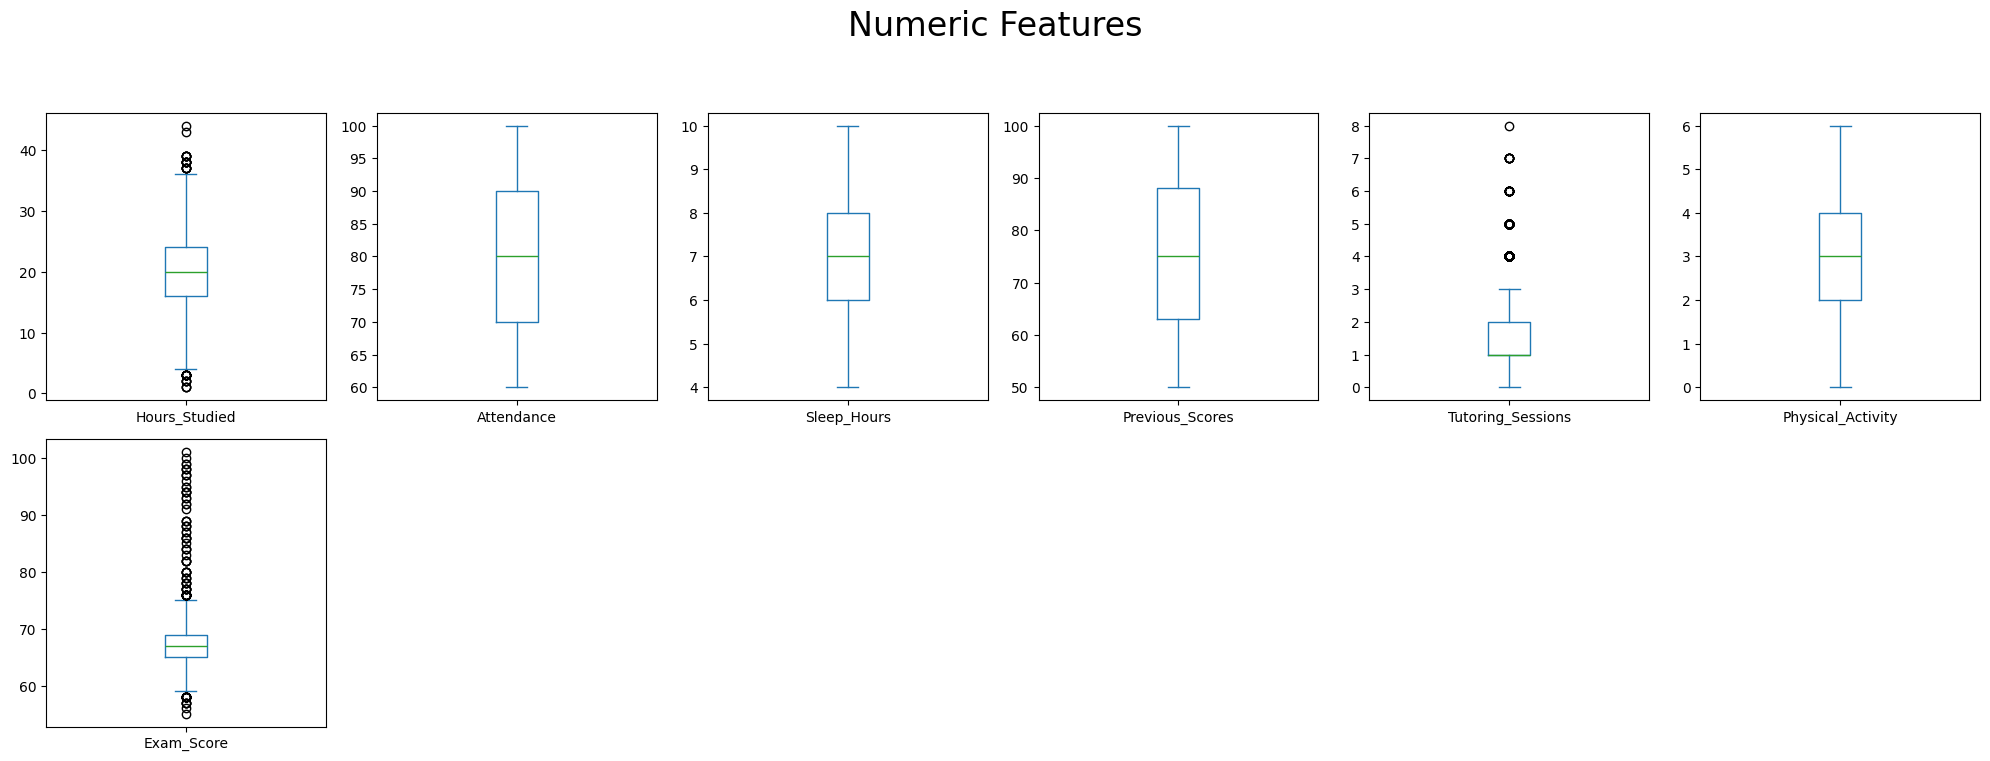

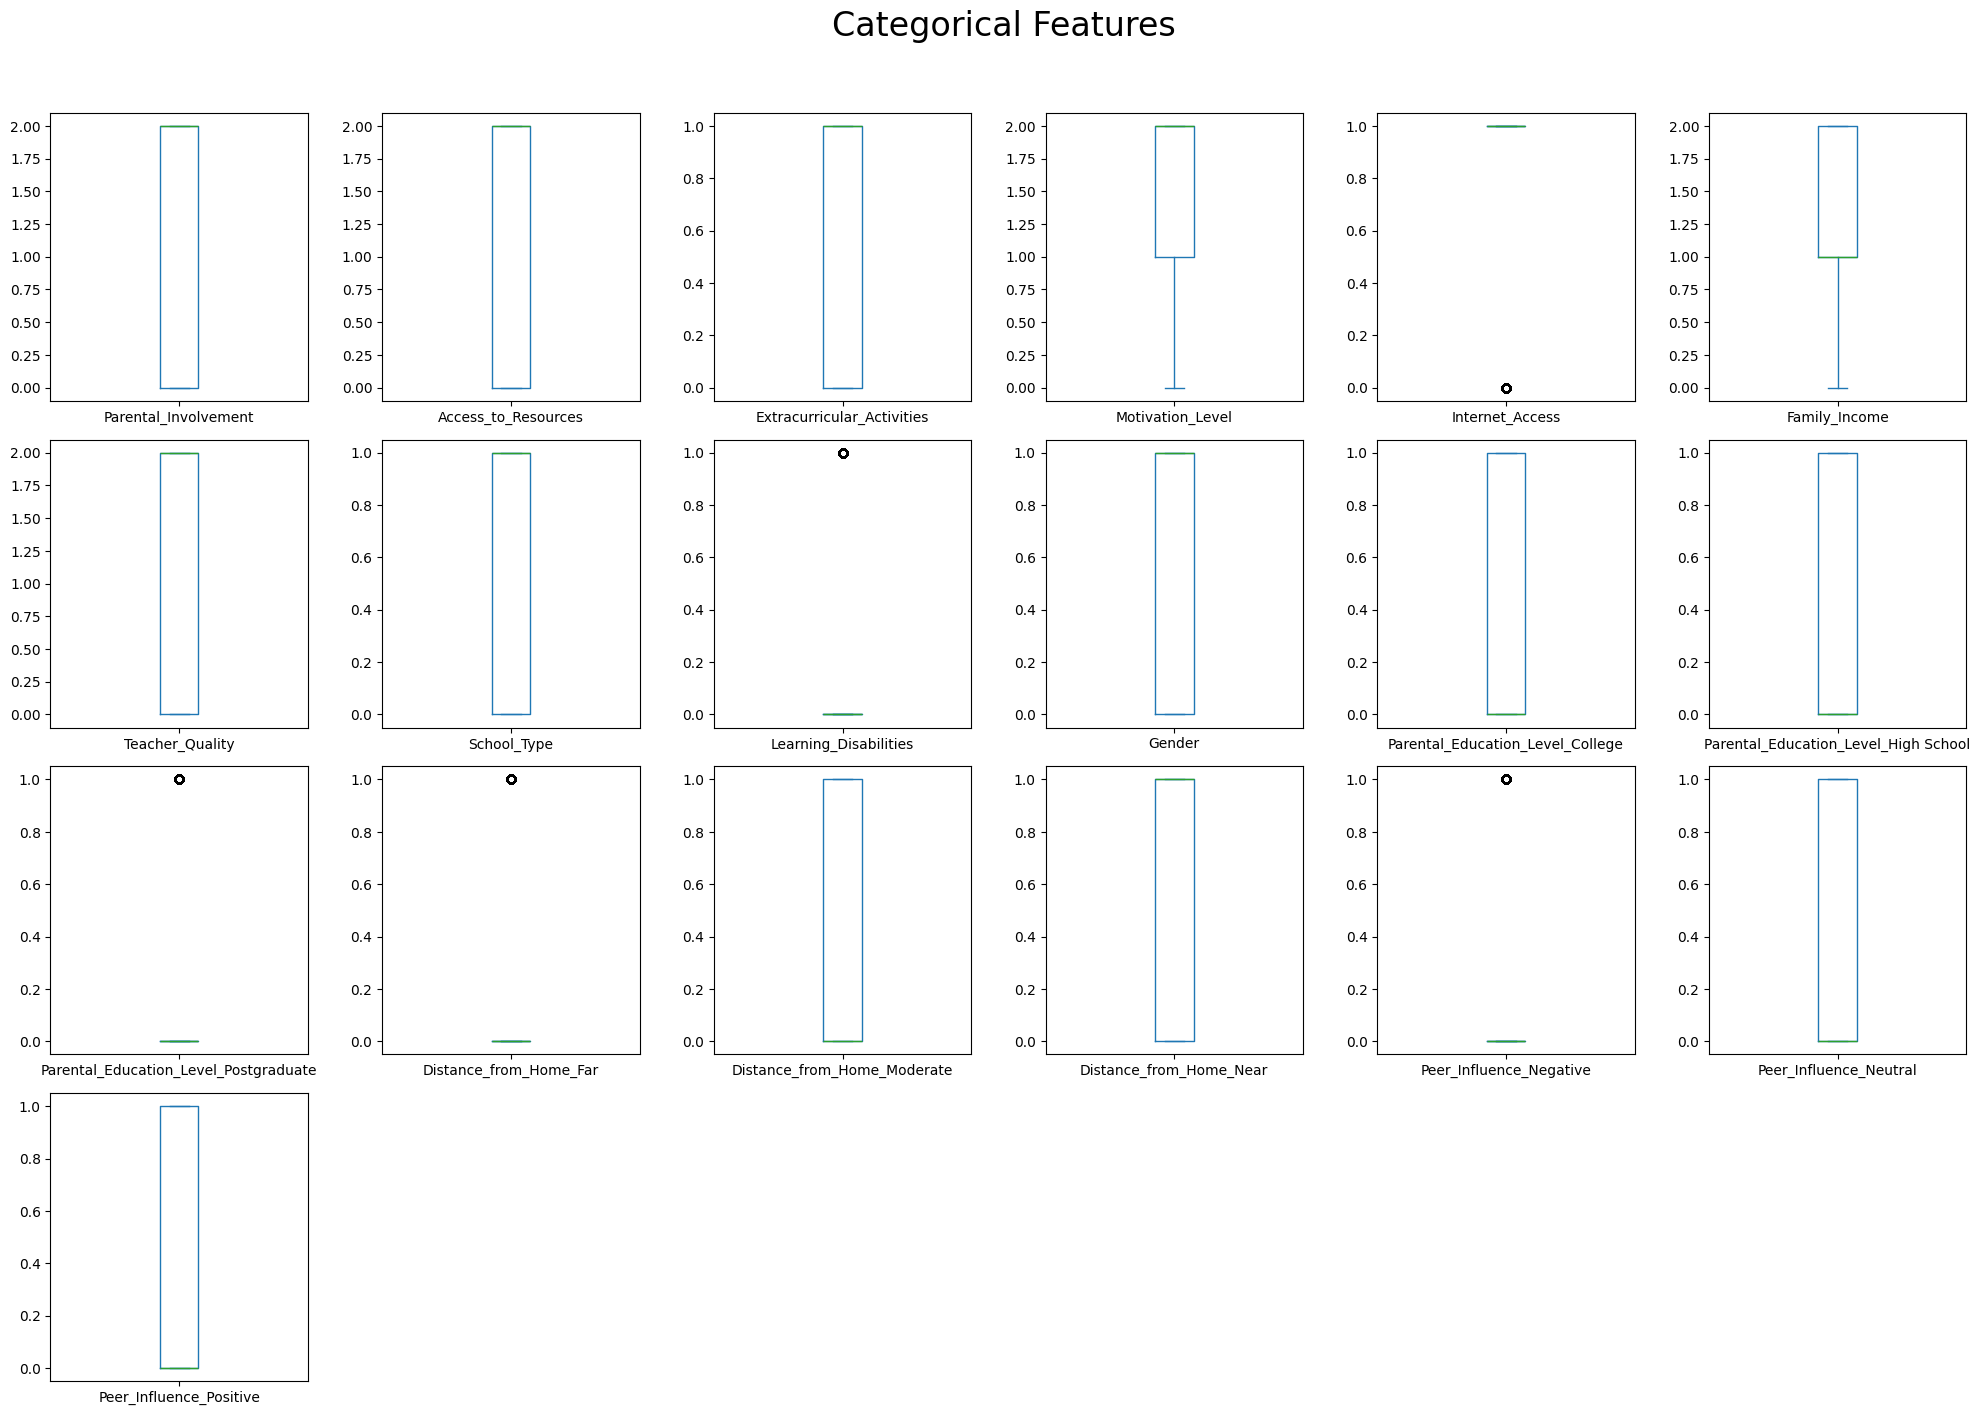

In [149]:
# ฟีเจอร์ที่เป็น numeric
numeric_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                    'Previous_Scores', 'Tutoring_Sessions',
                    'Physical_Activity', 'Exam_Score']

# แสดง boxplot สำหรับฟีเจอร์ที่เป็น numeric
df[numeric_features].plot(kind='box', subplots=True, layout=(6, 6), figsize=(20, 20), sharex=False, sharey=False)
plt.suptitle("Numeric Features", y=1.02, fontsize=24)
plt.tight_layout()
plt.show()

# ฟีเจอร์ที่เป็น categorical
categorical_features = df.drop(columns=numeric_features).columns

# แสดง boxplot สำหรับฟีเจอร์ที่เป็น categorical
df[categorical_features].plot(kind='box', subplots=True, layout=(6, 6), figsize=(20, 20), sharex=False, sharey=False)
plt.suptitle("Categorical Features", y=1.02, fontsize=24)
plt.tight_layout()
plt.show()

Boxplot แสดงถึง outliners ที่ข้อมูลออกนอกจากพวกเกินไป   
แต่ความเป็นจริง จุดตรงนั้นอาจจะไม่ใช่ outliners จริงๆก็ได้ลองพิจารณา distributions ต่อ

ในส่วนของ Categorical features นั้นไม่พบค่าสิ่งผิดปกติหรือต่างจากพวก

**histogram check**

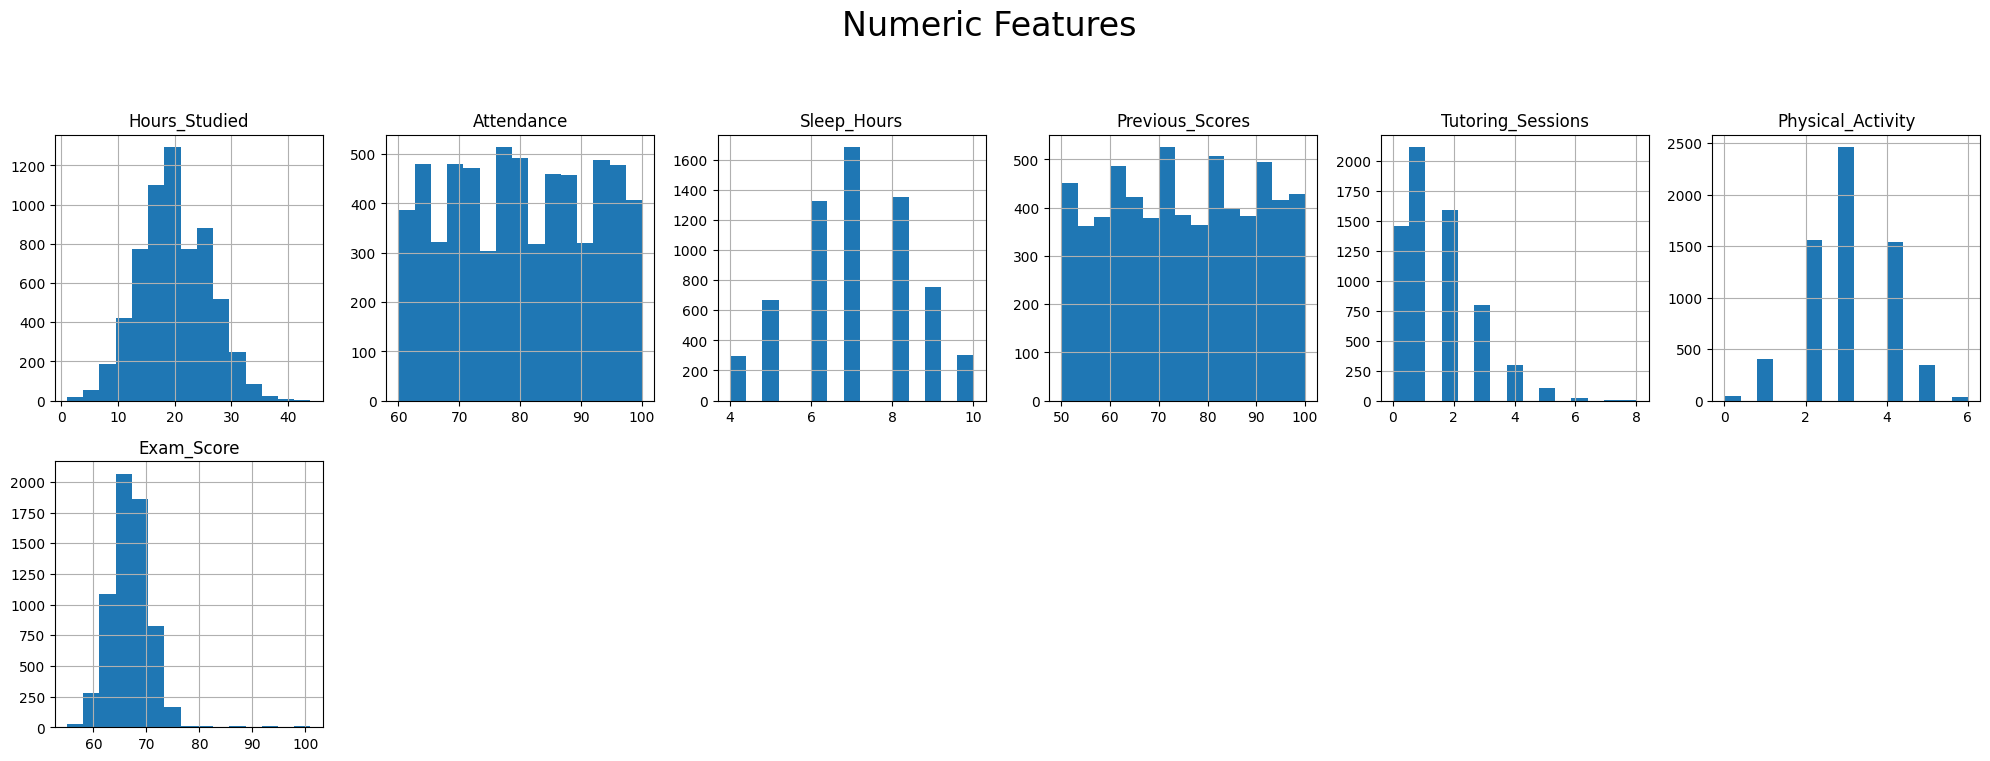

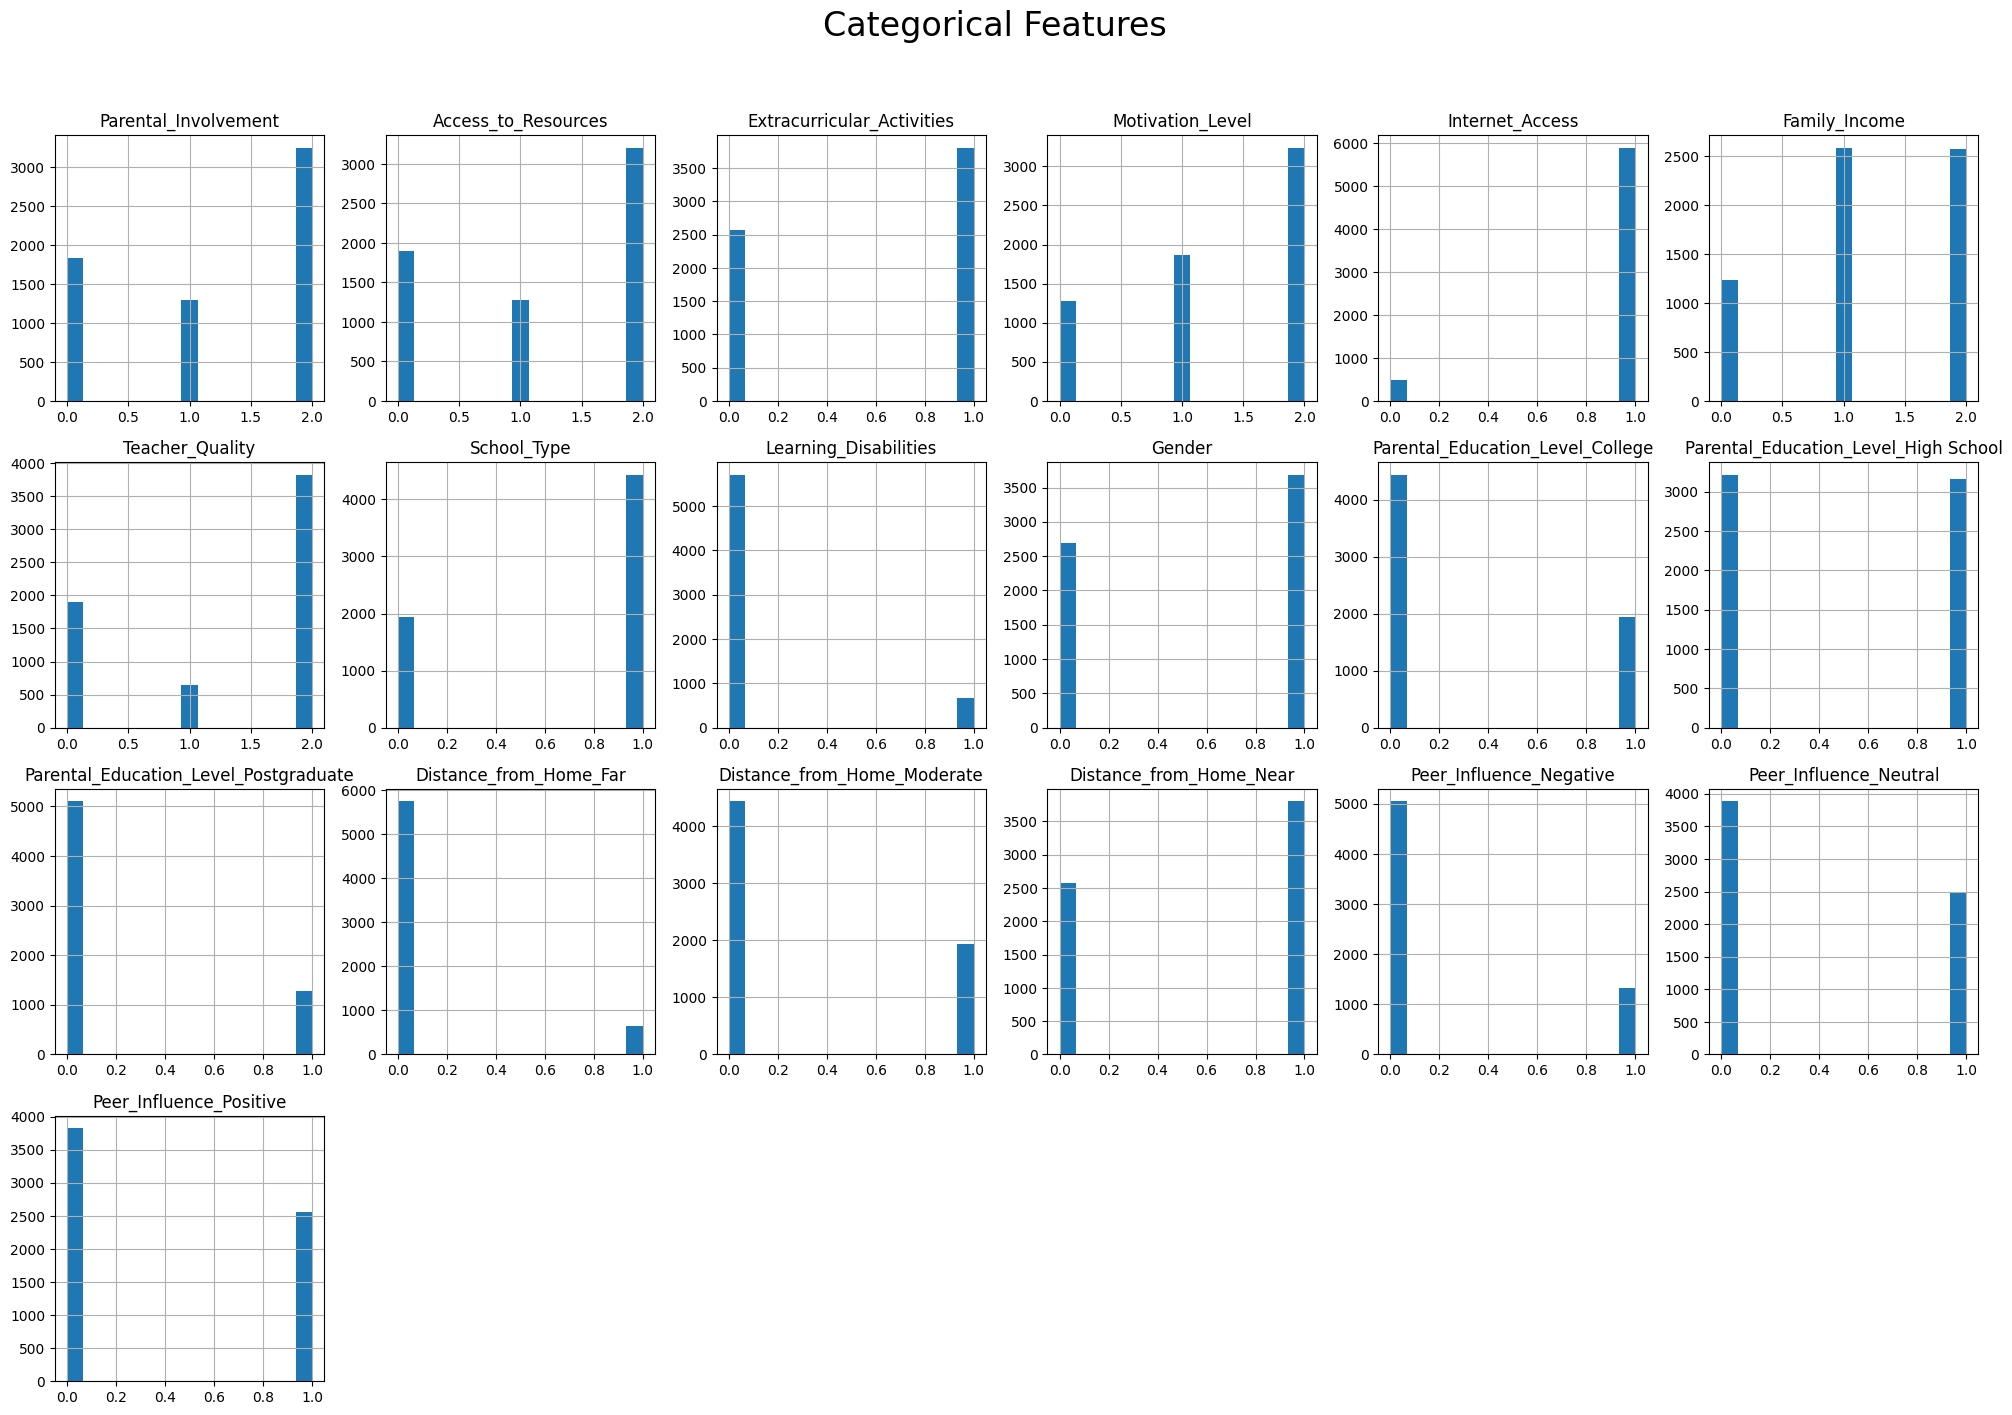

In [150]:
# ฟีเจอร์ที่ไม่ใช่ categorical
non_categorical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                            'Previous_Scores', 'Tutoring_Sessions',
                            'Physical_Activity', 'Exam_Score']

# แสดง histogram สำหรับฟีเจอร์ที่ไม่ใช่ categorical
df[non_categorical_features].hist(figsize=(20, 20), layout=(6, 6), bins=15)
plt.suptitle("Numeric Features ", y=1.02, fontsize=24)
plt.tight_layout()
plt.show()

# ฟีเจอร์ที่เป็น categorical
categorical_features = df.drop(columns=non_categorical_features).columns

# แสดง histogram สำหรับฟีเจอร์ที่เป็น categorical
df[categorical_features].hist(figsize=(20, 20), layout=(6, 6), bins=15)
plt.suptitle("Categorical Features", y=1.02, fontsize=24)
plt.tight_layout()
plt.show()

ค้นพบว่า Hours_Studied , Exam_Score มีลักษณะข้อมูลที่เหมือนจะมี outliner อยู่ ออกจะเบ้ทางขวาเล็กน้อย

array([[<Axes: title={'center': 'Hours_Studied'}>,
        <Axes: title={'center': 'Exam_Score'}>]], dtype=object)

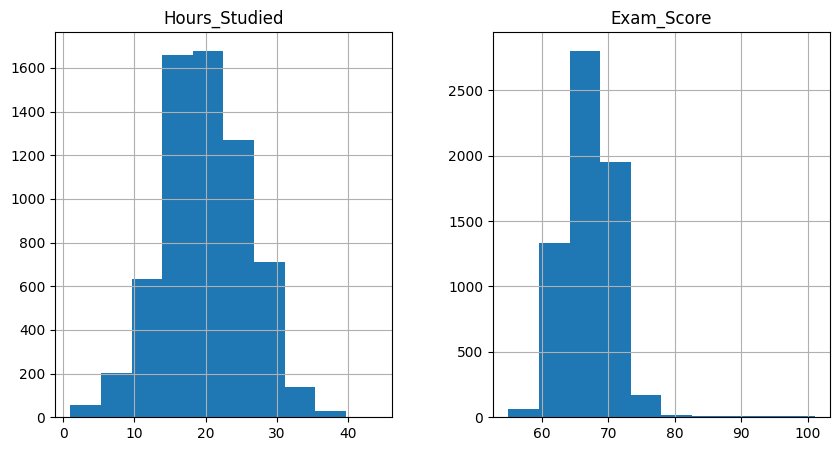

In [151]:
df[['Hours_Studied','Exam_Score']].hist(figsize=(10,5))

ข้อมูลมีการเบ้ขวาเล็กน้อย เมื่อพิจารณา boxplot ที่ 2 features นี้บ่งบอกถึง outliners แล้วแต่ในหลักความเป็นจริง real data   
ในเชิงความหมาย Hours_Studied คือชั่วโมงในการอ่านหนังสือ ซึ่งในความเป็นจริงแล้ว มันสามารถเกินขึ้นในค่าสูงๆได้  
Exam_Score ก็เหมือนกันมีโอกาสเกิดคะแนน เต็มได้เหมือนกัน ดังนั้น ทั้ง 2 features นี้จะไม่ลบ outliners  


ปัญหาของ Exam_Score อีกอย่างหนึ่งมันเป็น Target feature ซึ่งในช่วง 79-100 มีข้อมูลที่ค่อนข้างจะน้อย อาจจะมีปัญหาเรื่องประสิทธิภาพในการ ทำนายข้อมูลในช่วงนี้ได้

**Statistics summary**

In [152]:
df.describe().T

count       mean        std   min  \
Hours_Studied                          6378.0  19.977109   5.985460   1.0   
Attendance                             6378.0  80.020853  11.550723  60.0   
Parental_Involvement                   6378.0   1.221856   0.865149   0.0   
Access_to_Resources                    6378.0   1.204453   0.870959   0.0   
Extracurricular_Activities             6378.0   0.596896   0.490560   0.0   
Sleep_Hours                            6378.0   7.034964   1.468033   4.0   
Previous_Scores                        6378.0  75.066165  14.400389  50.0   
Motivation_Level                       6378.0   1.307306   0.783201   0.0   
Internet_Access                        6378.0   0.923957   0.265087   0.0   
Tutoring_Sessions                      6378.0   1.495296   1.233984   0.0   
Family_Income                          6378.0   1.209470   0.742549   0.0   
Teacher_Quality                        6378.0   1.301192   0.898870   0.0   
School_Type                            6378.0   0.695202   0.460358   0.0   
Physical_Activity                      6378.0   2.972719   1.028926   0.0   
Learning_Disabilities                  6378.0   0.104735   0.306236   0.0   
Gender                                 6378.0   0.578238   0.493880   0.0   
Parental_Education_Level_College       6378.0   0.304014   0.460025   0.0   
Parental_Education_Level_High School   6378.0   0.495296   0.500017   0.0   
Parental_Education_Level_Postgraduate  6378.0   0.200690   0.400548   0.0   
Distance_from_Home_Far                 6378.0   0.099718   0.299647   0.0   
Distance_from_Home_Moderate            6378.0   0.304327   0.460158   0.0   
Distance_from_Home_Near                6378.0   0.595955   0.490745   0.0   
Peer_Influence_Negative                6378.0   0.208529   0.406289   0.0   
Peer_Influence_Neutral                 6378.0   0.391188   0.488055   0.0   
Peer_Influence_Positive                6378.0   0.400282   0.489994   0.0   
Exam_Score                             6378.0  67.252117   3.914217  55.0   

                                        25%   50%   75%    max  
Hours_Studied                          16.0  20.0  24.0   44.0  
Attendance                             70.0  80.0  90.0  100.0  
Parental_Involvement                    0.0   2.0   2.0    2.0  
Access_to_Resources                     0.0   2.0   2.0    2.0  
Extracurricular_Activities              0.0   1.0   1.0    1.0  
Sleep_Hours                             6.0   7.0   8.0   10.0  
Previous_Scores                        63.0  75.0  88.0  100.0  
Motivation_Level                        1.0   2.0   2.0    2.0  
Internet_Access                         1.0   1.0   1.0    1.0  
Tutoring_Sessions                       1.0   1.0   2.0    8.0  
Family_Income                           1.0   1.0   2.0    2.0  
Teacher_Quality                         0.0   2.0   2.0    2.0  
School_Type                             0.0   1.0   1.0    1.0  
Physical_Activity                       2.0   3.0   4.0    6.0  
Learning_Disabilities                   0.0   0.0   0.0    1.0  
Gender                                  0.0   1.0   1.0    1.0  
Parental_Education_Level_College        0.0   0.0   1.0    1.0  
Parental_Education_Level_High School    0.0   0.0   1.0    1.0  
Parental_Education_Level_Postgraduate   0.0   0.0   0.0    1.0  
Distance_from_Home_Far                  0.0   0.0   0.0    1.0  
Distance_from_Home_Moderate             0.0   0.0   1.0    1.0  
Distance_from_Home_Near                 0.0   1.0   1.0    1.0  
Peer_Influence_Negative                 0.0   0.0   0.0    1.0  
Peer_Influence_Neutral                  0.0   0.0   1.0    1.0  
Peer_Influence_Positive                 0.0   0.0   1.0    1.0  
Exam_Score                             65.0  67.0  69.0  101.0

In [153]:
df.describe().T.tail(1)

count       mean       std   min   25%   50%   75%    max
Exam_Score  6378.0  67.252117  3.914217  55.0  65.0  67.0  69.0  101.0

ค้นพบว่า Exam_Score มีคะแนนสอบมากสุด 101 แต่ความเป็นจริงคะแนนเต็ม 100 ดังนั้น กำจัดออก

In [154]:
df[df['Exam_Score'] >= 100]

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
94               18          89                     0                    2   
1525             27          98                     1                    2   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
94                             1            4               73   
1525                           1            6               93   

      Motivation_Level  Internet_Access  Tutoring_Sessions  ...  \
94                   2                1                  3  ...   
1525                 1                0                  5  ...   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
94                                 1.0                                   0.0   
1525                               0.0                                   1.0   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
94                                      0.0                     0.0   
1525                                    0.0                     0.0   

      Distance_from_Home_Moderate  Distance_from_Home_Near  \
94                            0.0                      1.0   
1525                          1.0                      0.0   

      Peer_Influence_Negative  Peer_Influence_Neutral  \
94                        0.0                     0.0   
1525                      0.0                     0.0   

      Peer_Influence_Positive  Exam_Score  
94                        1.0         100  
1525                      1.0         101  

[2 rows x 26 columns]

In [155]:
# เทคนิค ลบ
df = df[df['Exam_Score'] < 100]

In [156]:
df[df['Exam_Score'] >= 100]

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Physical_Activity, Learning_Disabilities, Gender, Parental_Education_Level_College, Parental_Education_Level_High School, Parental_Education_Level_Postgraduate, Distance_from_Home_Far, Distance_from_Home_Moderate, Distance_from_Home_Near, Peer_Influence_Negative, Peer_Influence_Neutral, Peer_Influence_Positive, Exam_Score]
Index: []

[0 rows x 26 columns]

ในเรื่องของ outliners ในหลักความเป็นจริงแล้ว Hours_Studied , Exam_Score สามารถเกิดข้อมูลนั้นได้จริงๆซึ่ง ดังนั้นจะไม่ทำการลบ   
แต่ปัญหาของ Exam_Score ก็มี ในช่วง 79-100 มีข้อมูลที่ค่อนข้างจะน้อย อาจจะพบปัญหาตอนที่ไป train model ได้ทำนายค่าช่วงนี้ได้ไม่ดี



# 4.Data deduplication

ทำการเช็คข้อมูลที่มี แถวหรือคอลัมน์ที่ ซ้ำกัน

In [157]:
# ตรวจสอบแถวที่ซ้ำกันทั้งหมด
duplicate_rows = df[df.duplicated()]
all_duplicates = df[df.duplicated(keep=False)]  # รวมทุกแถวในกลุ่มที่ซ้ำ

# แสดงผลลัพธ์
if not duplicate_rows.empty:
    print("**แถวที่ซ้ำกันทั้งหมด (ยกเว้นแถวแรกในกลุ่ม)**:")
    print(duplicate_rows.to_string(index=False))
else:
    print("ไม่มีแถวซ้ำในข้อมูล")

if not all_duplicates.empty:
    print("**แถวทั้งหมดที่เป็นส่วนหนึ่งของการซ้ำ:**")
    print(all_duplicates.to_string(index=False))

ไม่มีแถวซ้ำในข้อมูล


สรุป Data Preparetion   
สรุปก่อน Clean มี 6607 แถว 20 คอลัมน์   
หลัง Clean เหลือ 6376 แถว 26 คอลัมน์

# EDA for train model
สืบค้นข้อมูลเบื้องต้น ว่าข้อมูลมีความสัมพันธ์กันเป็นอย่างไร

# 1.Correlation

# 1.1 Spearman 
ที่ใช้ Spearman เพราะว่าหยืดหยุ่น ไม่ได้ใช้หลักการของ paramatics ไม่ต้องเช็คว่าข้อมูลเป็น การแจกแจงปกติมั้ย สามารถใช้ได้เลย   
และที่สำคัญ สามารถใช้กับ ข้อมูลที่เป็น Continuous  vs (Ordinal and Binary) หรือ Continuous vs Continuous ได้ทั้งคู่เลยเพราะใช้ Rank ในการคิด  
จริงๆ สามารถใช้ได้ทุกแบบแต่ว่า ค่าที่ได้อาจจะไม่ตรงมากนักแต่สามารถอนุมานได้  

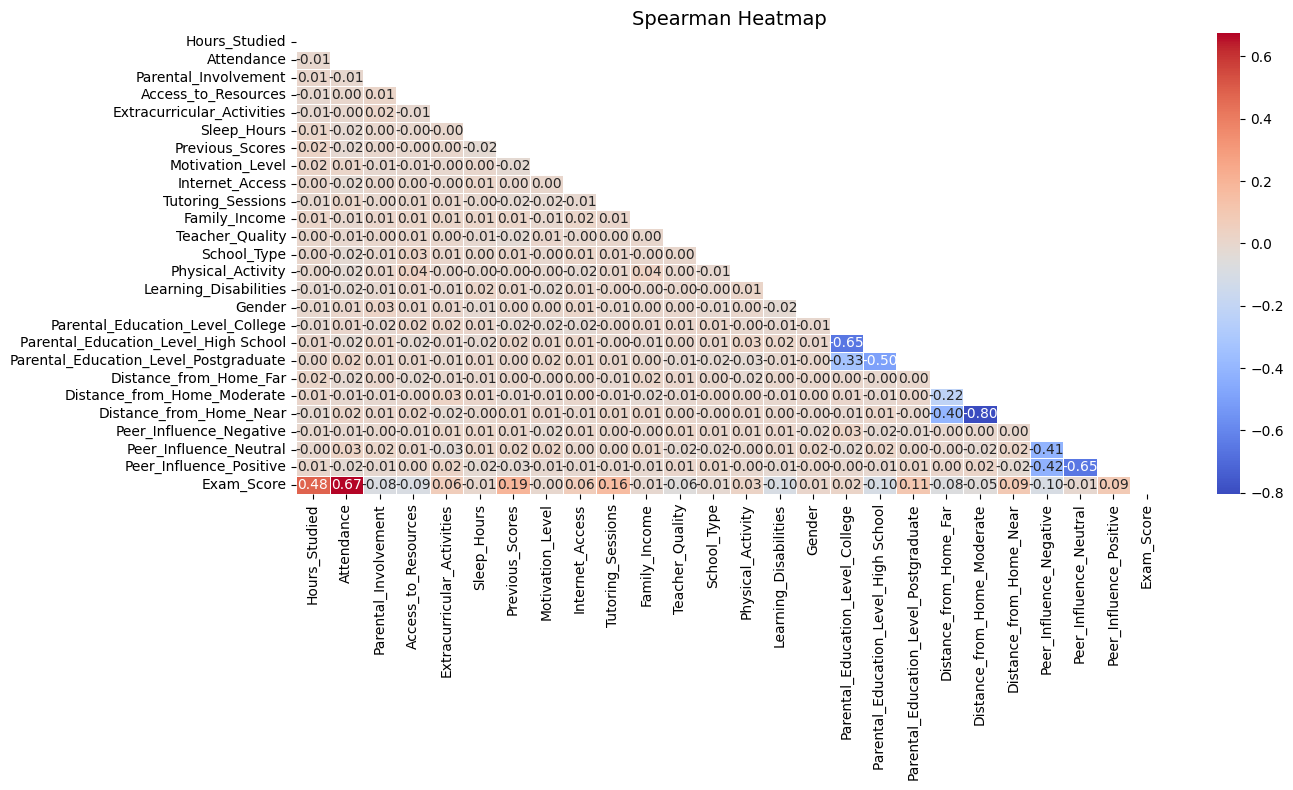

In [158]:
# คำนวณ correlation matrix
corr_matrix = df.corr(method='spearman')

# สร้าง heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True ,mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Spearman Heatmap', fontsize=14)
plt.tight_layout()
plt.show()                    

เนื่องจากข้อมูลประกอบด้วยทั้งตัวแปรเชิงหมวดหมู่ (categorical) และตัวแปรเชิงตัวเลข (numerical) การวิเคราะห์ความสัมพันธ์ทางสถิติจำเป็นต้องเลือกวิธีที่เหมาะสมกับประเภทข้อมูล เช่น Pearson Correlation สำหรับตัวแปรเชิงตัวเลขที่มีการแจกแจงปกติ หรือ Spearman's Rank Correlation สำหรับข้อมูลที่ไม่มีการแจกแจงปกติ หรือข้อมูลที่เป็นเชิงลำดับ (ordinal) Spearman's Correlation มีความยืดหยุ่นมากกว่า เพราะสามารถวิเคราะห์ความสัมพันธ์ระหว่างตัวแปรเชิงตัวเลขต่อเนื่องกับตัวแปรเชิงหมวดหมู่ที่มีลำดับได้ จึงเหมาะสมในกรณีนี้ เนื่องจากสามารถครอบคลุมการวิเคราะห์ข้อมูลทุกประเภทในชุดข้อมูลได้อย่างมีประสิทธิภาพ และก็ไม่จำเป็นต้องแยกอย่างระเอียดดูเป็นภาพรวมๆ

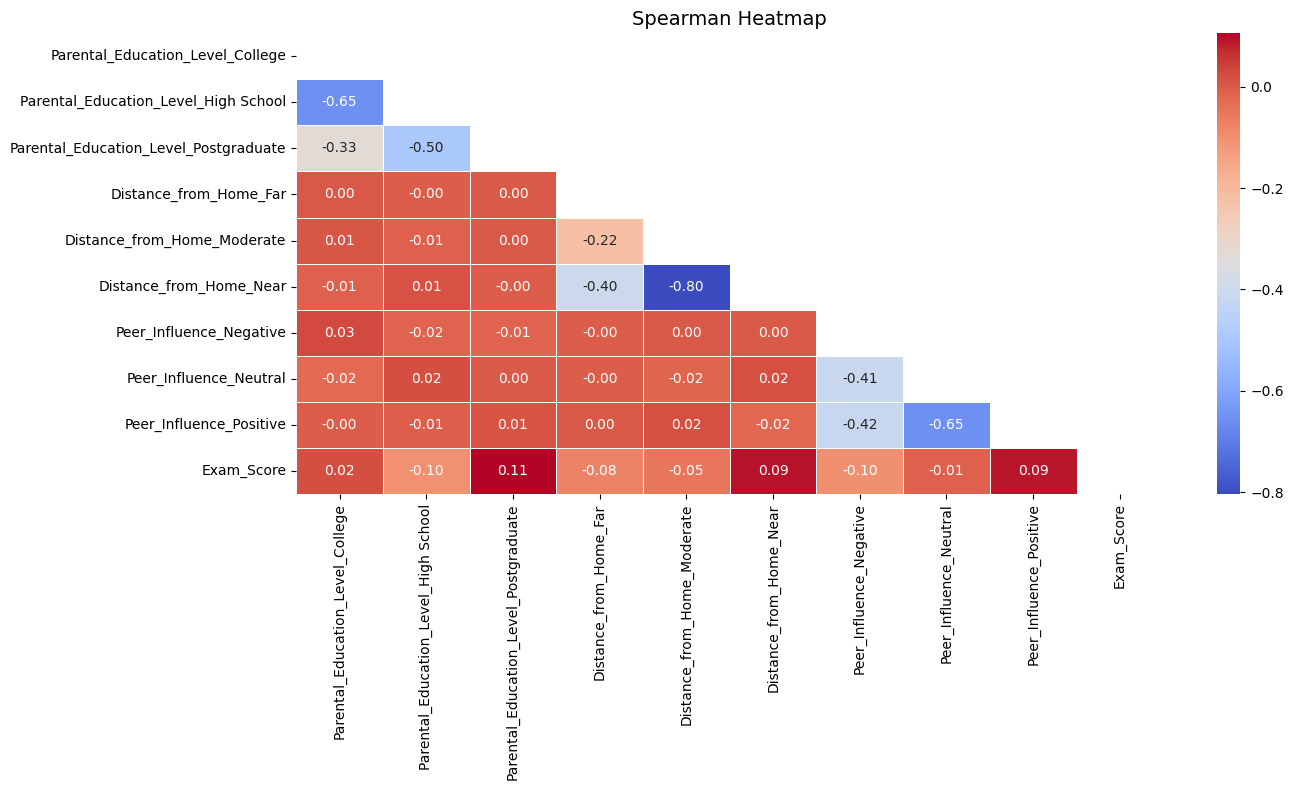

In [159]:
# คำนวณ correlation matrix
corr_matrix = df.drop(columns=['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Physical_Activity', 'Learning_Disabilities', 'Gender']).corr(method='spearman')

# สร้าง heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True ,mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Spearman Heatmap', fontsize=14)
plt.tight_layout()
plt.show()                    

ดูเหมือนว่า     
Parental_Education_Level_College vs Parental_Education_Level_High School       
Distance_from_Home_Far vs Distance_from_Home_Moderate     
Distance_from_Home_Near vs Peer_Influence_Positive  
จะมีความสัมพันธ์ด้วยกันเองที่ค่อนข้างสูง ซึ่งอาจจะมีปัญหา ใน Linear regression ได้ว่า Multicollinearity อาจจะทำให้ สัมประสิทธิ์ผิดพลาดได้



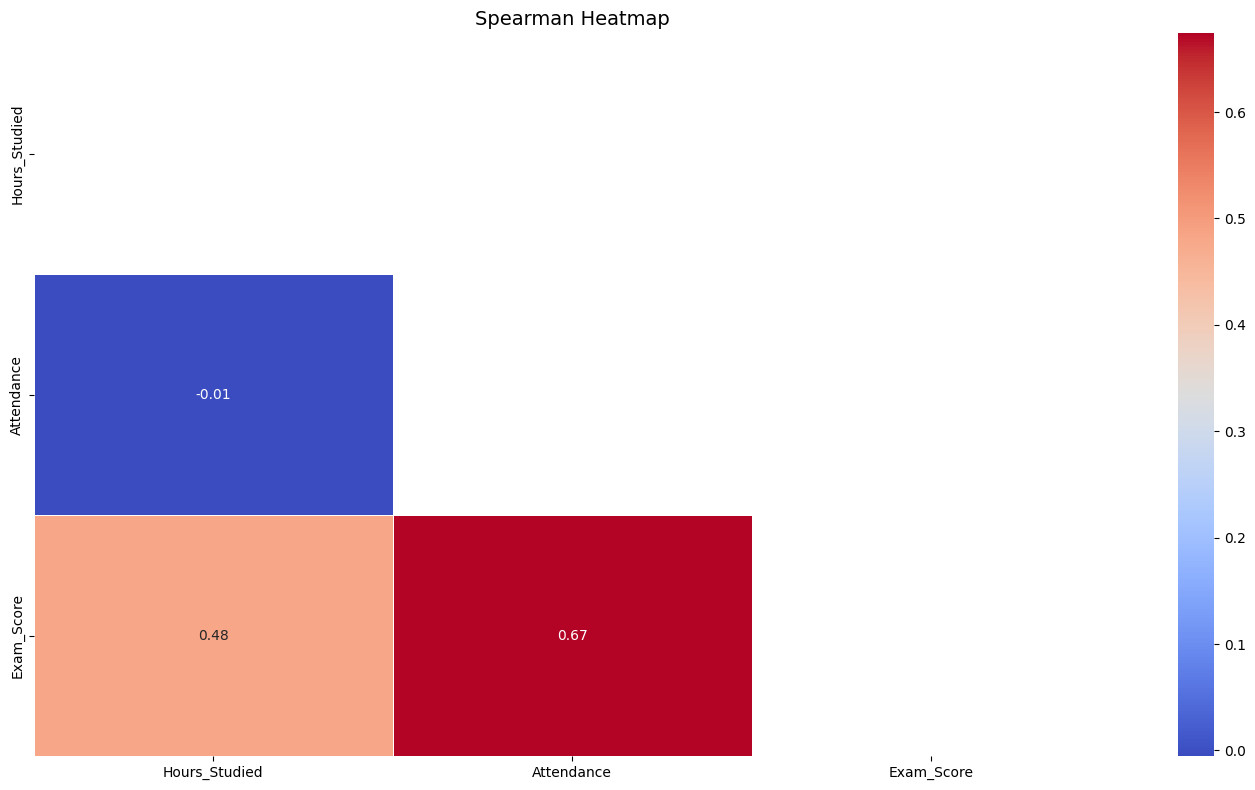

In [160]:
# คำนวณ correlation matrix
corr_matrix = df[['Hours_Studied','Attendance','Exam_Score']].corr(method='spearman')

# สร้าง heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True ,mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Spearman Heatmap', fontsize=14)
plt.tight_layout()
plt.show()                    

จากการสังเกตพบว่า Hours_Studied และ Attendance มีความสัมพันธ์สูงกกับ Target ซึ่งหมายความว่าทั้ง 2 ฟีเจอร์นี้อาจมีอิทธิพลต่อ Target อย่างมาก โดยเฉพาะในการสร้างโมเดล Linear Regression เพราะเมื่อฟีเจอร์ทั้งสองเพิ่มขึ้น ความน่าจะเป็นของ Target จะสูงขึ้นตามไปด้วย ดังนั้น ฟีเจอร์เหล่านี้น่าจะเป็นตัวแปรที่สำคัญที่สุดในการฝึกฝนโมเดลในกรณีนี้

# 2.Scatter plot
ดูความสัมพันธ์ feature with Targets

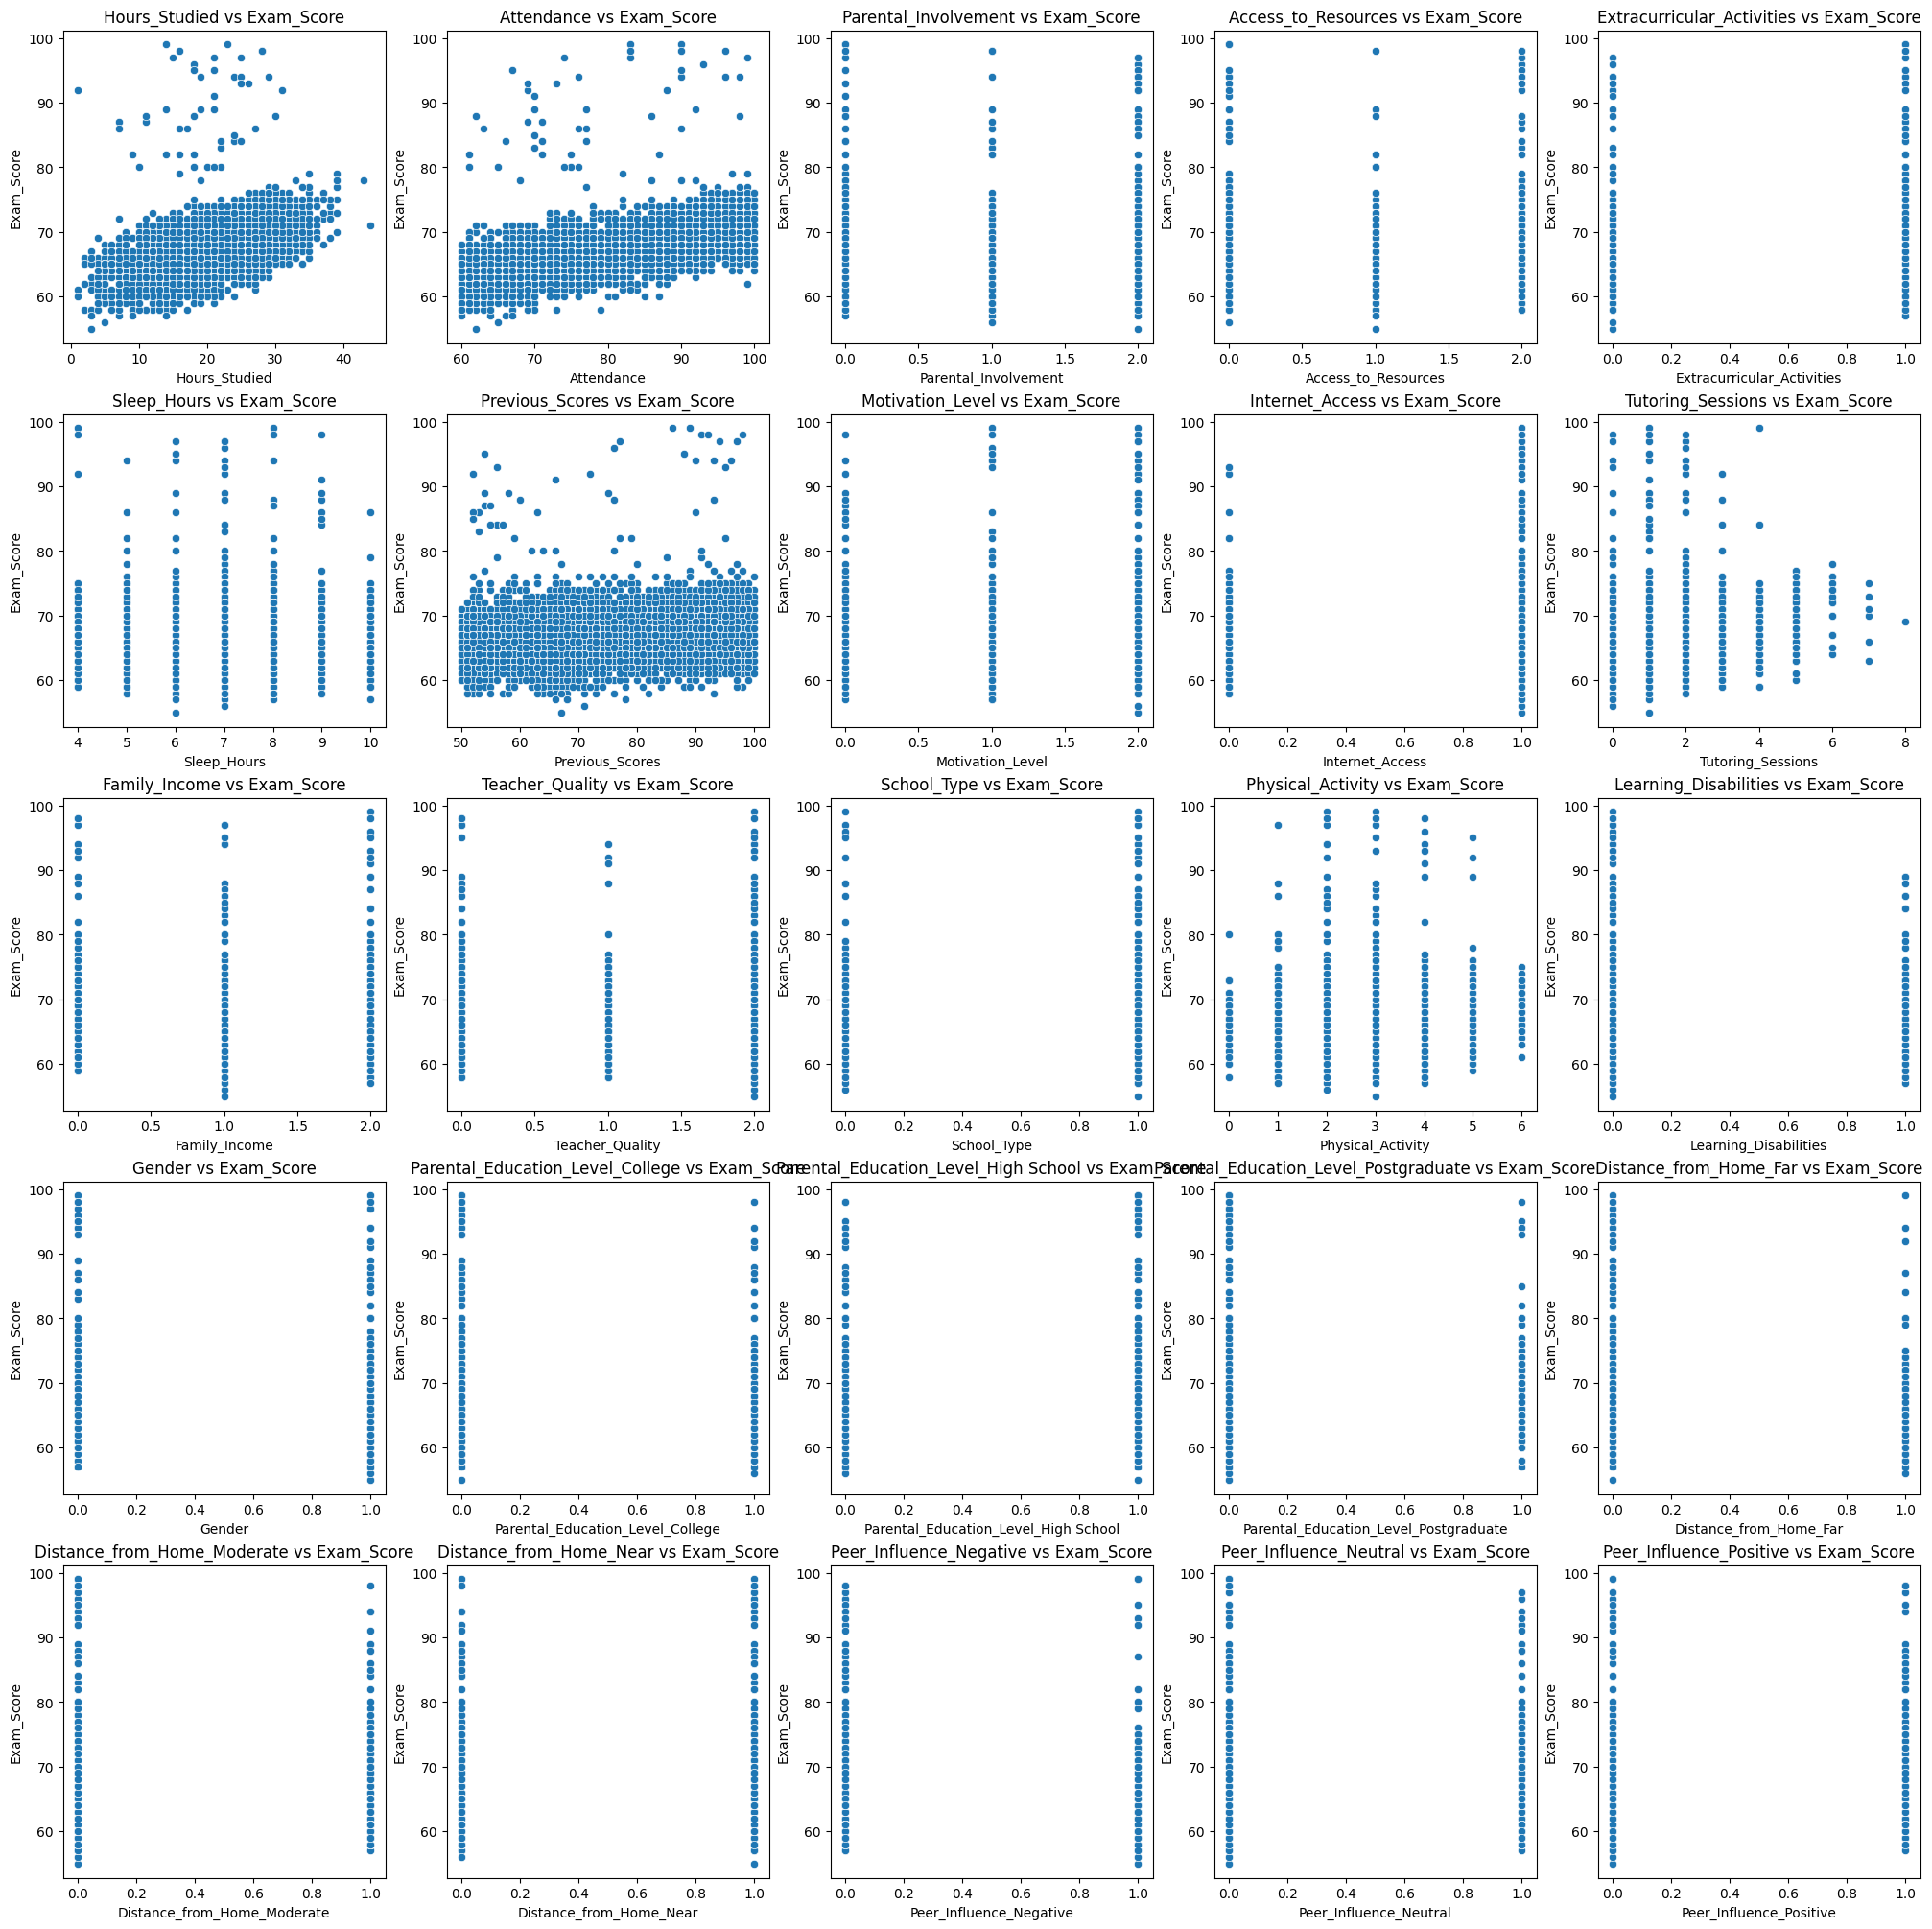

In [161]:
target = "Exam_Score"
features = df.columns.drop(target)

# ปรับจำนวนแถวและคอลัมน์ให้เหมาะสมกับ 25 ฟีเจอร์
n_features = len(features)
ncols = 5  # ตั้งคอลัมน์ให้มี 5 คอลัมน์
nrows = (n_features // ncols) + (n_features % ncols > 0)  # คำนวณจำนวนแถวโดยอัตโนมัติ

# สร้างกราฟ
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4*nrows), constrained_layout=True)
axes = axes.flatten()

# สร้าง scatter plot สำหรับแต่ละฟีเจอร์
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[i])
    axes[i].set_title(f"{feature} vs {target}")

# ซ่อนกราฟที่ไม่ได้ใช้งาน
for i in range(len(features), len(axes)):
    axes[i].set_visible(False)

plt.show()

พบว่า ฟีเจอร์ Hours_Studied, Attendance, และ Previous_Scores มีความสัมพันธ์เชิงเส้น (มีแนวโน้มที่จะเชิงเส้น) กับ Exam_Score (คะแนนสอบ) ซึ่งแสดงให้เห็นว่าฟีเจอร์เหล่านี้มีผลกระทบต่อคะแนนสอบในลักษณะที่คาดการณ์ได้ โดยที่ฟีเจอร์เหล่านี้สามารถช่วย ทำนายคะแนนสอบได้ดี ในโมเดล Linear Regression ที่ใช้ความสัมพันธ์เชิงเส้นระหว่างฟีเจอร์และทาเก็ต (target)    

ในหลักความเชิงความหมายเป็นจริง ชั่วโมงอ่านหนังสือ , การเข้าร่วมชั้นเรียน , คะแนนครั้งก่อน ก็สามารถเดา คะแนนสอบได้เหมือนกัน

# Workflow for model training and Evaluation
แผนผังการจัดการข้อมูลในการให้โมเดลเรียนรู้

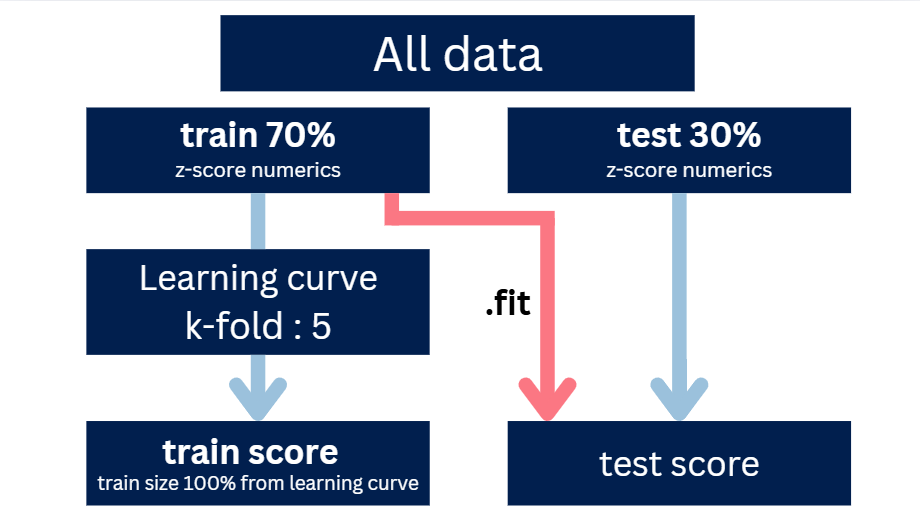

ในการแบ่ง ข้อมูลจะแบ่งเป็น 2 ส่วน
train : 70 %
test : 30 %

In [162]:
X = df.drop(columns=['Exam_Score'])  # Drop the target column
y = df['Exam_Score']  # Extract the target column

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45) #45

print('train data shape:', X_train.shape)
print('test data shape:', X_test.shape)

train data shape: (4463, 25)
test data shape: (1913, 25)


Learning curve คือ การแสดงกราฟการเรียนรู้ของ trainnig data มีจุดประสงค์คือ ดูว่าใน traning data ของเรามีแนวโน้มที่จะเกิดปัญหา Overfitting or Underfiting หรือไม่ หรือบ่งบอกถึง train data ที่เราแบ่งมามีคุณภาพมากเพียงใด  

แกน x จะเป็นจำนวน ข้อมูล train size ซึ่งจะใช้เป็น เพิ่มขึ้นทีละ 20% จนถึง 100% (20,40,60,80,100) 5 รอบ
แกน y จะมี 2 ค่า MAE train score , validation score   

ในการวิเคราะห์ ถ้าเกิดว่าโมเดล gap ระหว่างทั้ง 2 ของแกน y มี gap ที่ระยะห่างพอๆกันแสดงว่า good fitting    
ถ้าเกิด train score ดีมาก แต่ validation score แย่แสดงว่า Overfitting  
ถ้าเกิด train score แย่ validation score ก็แย่แสดงว่า Underfitting   

แต่ในแต่ละ train size เราจะใช้เทคนิค cross validation k-fold มาผสมด้วย โดยแบ่งในแต่ละ train size จะแบ่งข้อมูล k ส่วน ไว้ validation k-1 ส่วน   

In [164]:
cv_splitter = KFold(n_splits = 5, shuffle = True, random_state = 2) #2

for train_indices, test_indices in cv_splitter.split(X_train):
    print('train size:', train_indices.shape, 'test size:', test_indices.shape)

train size: (3570,) test size: (893,)
train size: (3570,) test size: (893,)
train size: (3570,) test size: (893,)
train size: (3571,) test size: (892,)
train size: (3571,) test size: (892,)


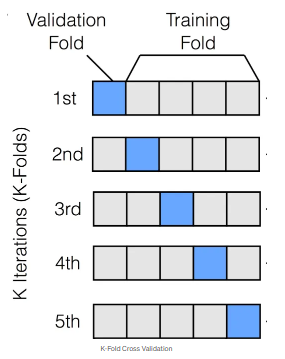

Cr. https://medium.com/@prabhucs01/demystifying-k-fold-cross-validation-3c9d410adddd

เมื่อตอน clean data   
target ในช่วง 79 - 100 มีจำนวนข้อมูลที่ค่อนข้างน้อยมากๆ เมื่อแบ่งได้ดังนี้

In [165]:
print('train_targets 79-100 = ',len(y_train[y_train > 79]))
print('test_targets 79-100 = ',len(y_test[y_test > 79]))

train_targets 79-100 =  31
test_targets 79-100 =  15


**Standardization**   
ทำการแปลงข้อมูลให้อยู่ในสเกลเดียวกัน บนพื้นฐาน ค่าเฉลี่ยเท่ากับศูนย์และส่วนเบี่ยงเบนมาตราฐานเท่ากับหนึ่ง  
  
เพื่อให้โมเดลเรียนรู้ข้อมูลได้มีประสิทธิภาพมากขึ้น ยกตัวอย่างเช่น บาท กับ ดอลล่า เหมือนเราแปลงให้เป็นสิ่งเดียวกัน 

In [166]:
# ระบุฟีเจอร์ที่ไม่ใช่ categorical
non_categorical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                             'Previous_Scores', 'Tutoring_Sessions',
                             'Physical_Activity']

# สร้างสำเนา dataset เพื่อเก็บผลลัพธ์
X_train_std = X_train.copy()
X_test_std = X_test.copy()

# Fit scaler กับเฉพาะ non-categorical features
scaler = StandardScaler()
scaler.fit(X_train[non_categorical_features])

# แปลงฟีเจอร์ใน X_train และ X_test
X_train_std[non_categorical_features] = scaler.transform(X_train[non_categorical_features])
X_test_std[non_categorical_features] = scaler.transform(X_test[non_categorical_features])

# ตรวจสอบผลลัพธ์ (optional)
X_train_std.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
5944       0.511761   -0.695854                     2                    0   
3781      -0.329984    1.285854                     2                    2   
532        0.006714    0.424242                     0                    2   
5957       0.680110   -0.265048                     0                    0   
399        1.185157    0.596565                     2                    2   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
5944                           1     2.002380         1.674454   
3781                           0    -0.721369         0.420638   
532                            0     1.321442        -0.972489   
5957                           1     1.321442         1.674454   
399                            0     0.640505         0.142013   

      Motivation_Level  Internet_Access  Tutoring_Sessions  ...  Gender  \
5944                 2                1           0.418003  ...       0   
3781                 2                1          -1.212009  ...       0   
532                  0                1           0.418003  ...       1   
5957                 2                1          -0.397003  ...       1   
399                  2                1          -0.397003  ...       1   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
5944                               0.0                                   0.0   
3781                               0.0                                   1.0   
532                                1.0                                   0.0   
5957                               0.0                                   1.0   
399                                0.0                                   1.0   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
5944                                    1.0                     0.0   
3781                                    0.0                     0.0   
532                                     0.0                     0.0   
5957                                    0.0                     0.0   
399                                     0.0                     0.0   

      Distance_from_Home_Moderate  Distance_from_Home_Near  \
5944                          0.0                      1.0   
3781                          0.0                      1.0   
532                           0.0                      1.0   
5957                          0.0                      1.0   
399                           1.0                      0.0   

      Peer_Influence_Negative  Peer_Influence_Neutral  Peer_Influence_Positive  
5944                      0.0                     1.0                      0.0  
3781                      0.0                     0.0                      1.0  
532                       0.0                     0.0                      1.0  
5957                      0.0                     0.0                      1.0  
399                       0.0                     1.0                      0.0  

[5 rows x 25 columns]

**เปรียบเทียบก่อนแปลงและหลังแปลง**

In [167]:
X_train.head(3)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
5944             23          72                     2                    0   
3781             18          95                     2                    2   
532              20          85                     0                    2   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
5944                           1           10               99   
3781                           0            6               81   
532                            0            9               61   

      Motivation_Level  Internet_Access  Tutoring_Sessions  ...  Gender  \
5944                 2                1                  2  ...       0   
3781                 2                1                  0  ...       0   
532                  0                1                  2  ...       1   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
5944                               0.0                                   0.0   
3781                               0.0                                   1.0   
532                                1.0                                   0.0   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
5944                                    1.0                     0.0   
3781                                    0.0                     0.0   
532                                     0.0                     0.0   

      Distance_from_Home_Moderate  Distance_from_Home_Near  \
5944                          0.0                      1.0   
3781                          0.0                      1.0   
532                           0.0                      1.0   

      Peer_Influence_Negative  Peer_Influence_Neutral  Peer_Influence_Positive  
5944                      0.0                     1.0                      0.0  
3781                      0.0                     0.0                      1.0  
532                       0.0                     0.0                      1.0  

[3 rows x 25 columns]

In [168]:
X_train_std.head(3)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
5944       0.511761   -0.695854                     2                    0   
3781      -0.329984    1.285854                     2                    2   
532        0.006714    0.424242                     0                    2   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
5944                           1     2.002380         1.674454   
3781                           0    -0.721369         0.420638   
532                            0     1.321442        -0.972489   

      Motivation_Level  Internet_Access  Tutoring_Sessions  ...  Gender  \
5944                 2                1           0.418003  ...       0   
3781                 2                1          -1.212009  ...       0   
532                  0                1           0.418003  ...       1   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
5944                               0.0                                   0.0   
3781                               0.0                                   1.0   
532                                1.0                                   0.0   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
5944                                    1.0                     0.0   
3781                                    0.0                     0.0   
532                                     0.0                     0.0   

      Distance_from_Home_Moderate  Distance_from_Home_Near  \
5944                          0.0                      1.0   
3781                          0.0                      1.0   
532                           0.0                      1.0   

      Peer_Influence_Negative  Peer_Influence_Neutral  Peer_Influence_Positive  
5944                      0.0                     1.0                      0.0  
3781                      0.0                     0.0                      1.0  
532                       0.0                     0.0                      1.0  

[3 rows x 25 columns]

# Train model
ขั้นตอนการ สอนโมเดล goal คือทำให้ MAE ของ test data น้อยมากที่สุด   
โดยโมเดลที่จะนำมาสอนโมเดล มีดังนี้  
1.Curve fitting  
2.Tree-models             

(ในการ Train model ทุกครั้ง Train score จะใช้ Learning Curve ผสมกับ Cross Validation K-Fold ทุกครั้ง)

# Curve fitting
เป็นตระกูลโมเดลที่ค้นหาเส้นที่ดีที่สุด โดยเกณฑ์ก็มีให้เลือกหลายแบบ แต่เราจะใช้ MAE เป็นหลัก

# 1.Linear Regression

**train and Evaluation**

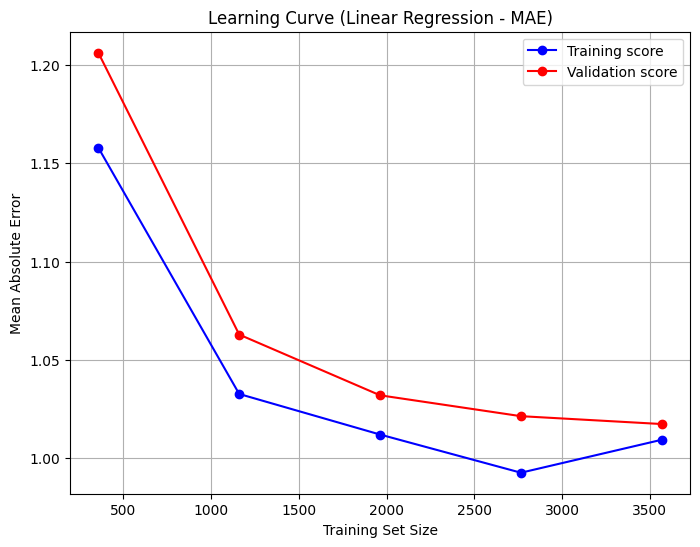

In [169]:
# สร้างโมเดล Linear Regression
linear = LinearRegression()

# Generate learning curve data
train_sizes_linear, train_scores_linear, validation_scores_linear = learning_curve(
    linear, X_train_std, y_train, cv=cv_splitter, scoring='neg_mean_absolute_error', 
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

# Calculate the mean and standard deviation of the scores
train_mean_linear = -train_scores_linear.mean(axis=1)  # Negate since the scoring is negative MAE
validation_mean_linear = -validation_scores_linear.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_linear, train_mean_linear, label="Training score", color="blue",marker='o')
plt.plot(train_sizes_linear, validation_mean_linear, label="Validation score", color="red",marker='o')
plt.title('Learning Curve (Linear Regression - MAE)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend(loc="best")
plt.grid(True)
plt.show()


สังเกตจากกราฟพบว่า gap ระหว่าง training score , validation score นั้นไม่ต่างกันมากนัก แสดงว่า training set ของเราเมื่อนำไป train ไม่น่าจะเกิด Overfitting

**test**

In [170]:
linear.fit(X_train_std,y_train)

train_mae_linear = train_mean_linear[-1]

y_pred = linear.predict(X_test_std)
test_mae_linear = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error train (MAE):", train_mae_linear)
print("Mean absolute Error test (MAE):", test_mae_linear)

Mean absolute Error train (MAE): 1.0093885186824287
Mean absolute Error test (MAE): 1.0187696027182436


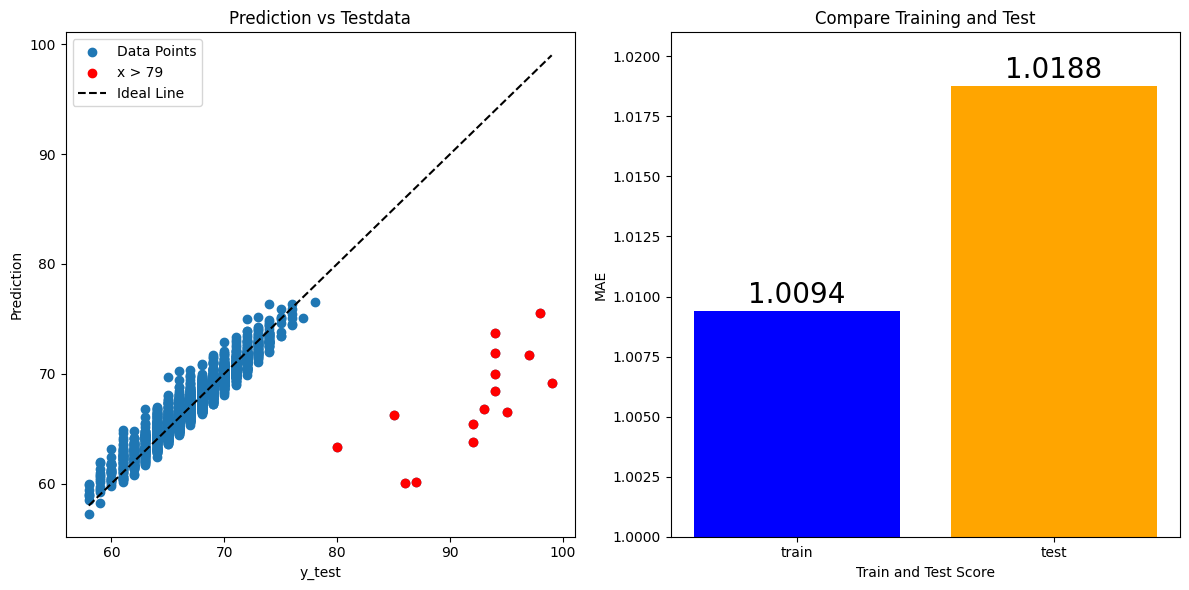

In [171]:
# สร้าง Figure
plt.figure(figsize=(12, 6))

# Plot 1: Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, label='Data Points')
highlight = y_test > 79  # เงื่อนไข x > 79
plt.scatter(y_test[highlight], y_pred[highlight], color='red', label='x > 79')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal Line')
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.title('Prediction vs Testdata')
plt.legend()

# Plot 2: Bar Chart
plt.subplot(1, 2, 2)
bars = plt.bar(['train', 'test'], [train_mae_linear, test_mae_linear], color=['blue', 'orange'])
# เพิ่มเลขบนแต่ละ bar พร้อมกำหนดขนาดฟอนต์
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.4f}', ha='center', va='bottom', fontsize=20)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Compare Training and Test')
plt.ylim(1.000, 1.021)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


จากที่เห็นดังภาพ    
ด้านซ้าย : เป็นการแสดงให้เห็นว่า model ทำนายได้ดีขนาดไหน ซึ่งจุดดาต้าที่เป็นสีแดง คือเป็นจุดที่ Exam_Score ที่ 75 - 100 มีข้อมูลน้อย model ไม่สามารถทำนายได้ดี ในช่วง 75 -  100 ตั้งข้อสันนิฐานว่า เกิดมาจากข้อมูลในช่วงตรงนี้มีจำนวนน้อย   

ด้านขวา : แสดง MAE ระหว่าง train กับ test ซึ่งแสดงให้เห็นว่า
ผลลัพธ์ค่อนข้างใกล้เคียงกัน ไม่น่าเกิด Overfitting และ train มากกว่า test อันนี้ไม่มีข้อผิดพลาดหรือเกิด data leakage

**ดูค่า coefficients**  
ถ้า feature ไหนมีค่าสัมประสิทธิ์ที่สูงจะแสดงว่ามี อิทธิพลกับ model นั้นมาก มีทั้งทางบวกและทางลบ

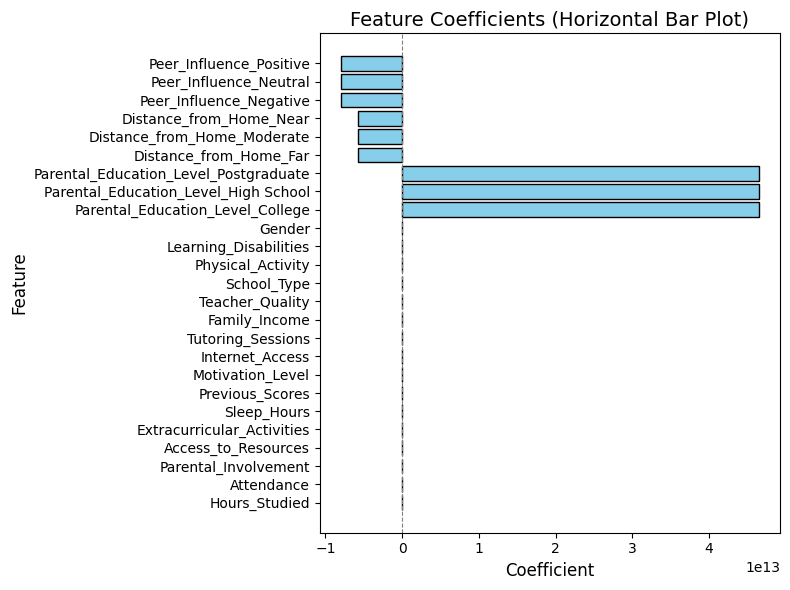

In [172]:
# สร้าง DataFrame สำหรับตาราง
coefficients_linear = linear.coef_

# ลบ Intercept ออกจากฟีเจอร์
coeff_table_linear = pd.DataFrame({
    'Feature': list(X_train.columns),
    'Coefficient': coefficients_linear,
})

# สร้างกราฟ Horizontal Bar Plot
plt.figure(figsize=(8, 6))
plt.barh(coeff_table_linear['Feature'], coeff_table_linear['Coefficient'], color='skyblue', edgecolor='black')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # เส้นแกน 0
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Coefficients (Horizontal Bar Plot)', fontsize=14)
plt.tight_layout()
plt.show()

จากกราฟแสดงให้เห็นว่า เหมือนจะเกิดปัญหามีบางฟีเจอร์ที่ มีค่าสัมประสิทธิ์ที่ผิดปกติ หรือ สูงมากผิดปกติ อาจจะเกิดปัญหา Multicollinearity ได้   

\begin{equation}
\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
\end{equation}


\begin{equation}
(\mathbf{X}^T \mathbf{X}) 
\end{equation}

ในส่วนของ Term นี้ เมื่อ Matrix X ที่เก็บฟีเจอร์ของข้อมูล ถ้ามีฟีเจอร์ที่มีความสัมพันธ์กันเองสูง ๆ ค่า determinant ของ Termนี้ จะมีค่าต่ำมาก ซึ่งหมายความว่า Matrix นี้ใกล้จะเป็น singular 
เมื่อค่า determinant ต่ำ จะทำให้การหา inverse เป็นเรื่องยาก หรือถ้าหาได้ก็อาจจะได้ค่า inverse ที่ไม่เสถียร ซึ่งอาจทำให้เกิด coefficient ที่มีค่าผิดปกติสูง หรือ variance สูงในค่า coefficients ของโมเดล ทำให้เกิด coefficient ที่มีค่าสูงเกินไป 


ทำไม determinant ใกล้ 0 ถึงทำให้ ค่า inverse ยิ่งไม่เสถียรยกตัวอย่างสูตรการหา inverse 3x3

\begin{equation}
A^{-1} = \frac{1}{\text{det}(A)} \cdot \text{adj}(A)
\end{equation}

det(A) เป็นตัวหารซึ่งแสดงให้เห็นว่า ยิ่งเลขเข้าใกล้ 0 จะทำให้ inverse มีค่ายิ่งสูงขึ้น


โดยสรุปทั้งหมดของ Linear Regression   
1.จากผลลัพธ์ค่า MAE ระหว่าง train กับ test ซึ่งเมื่อนำไป test MAE สูงกว่า train เล็กน้อยซึ่งบ่งบอกว่าอาจจะไม่เกิด Overfitting หรือเรียนรู้มากเกินไป   
2.ในช่วงข้อมูลของ 75 - 100 ของ Targets มีข้อมูลค่อนข้างน้อยซึ่งในส่วนที่ model จับไม่ได้คือส่วนนี้   
3.ส่วน features ที่มีอิทธิพลหลักๆของ Linear regression ยังตีความไม่ได้เพราะเกิดปัญหา Multicollinearity

จากปัญหา ข้อที่ 2 มีวิธีแก้หลายวิธี   
1.เพิ่มข้อมูลด้วยเทคนิคต่างๆ (เป็นไปได้ยาก) ดังนั้นจะใช้ข้อถัดไป    
2.ลองเพิ่มประสิทธิภาพโมเดลให้เก่งขึ้น 

จากปัญหา ข้อที่ 3 มีวิธีแก้หลายวิธีเหมือนกัน     
1.จะลองตัดฟีเจอร์ที่ มีความสัมพันธ์กันสูงๆออก


# Multicollinearity

แก้ไข Multicollinearity

แสดง features ที่มีความสัมพันธ์กันเองสูงๆ

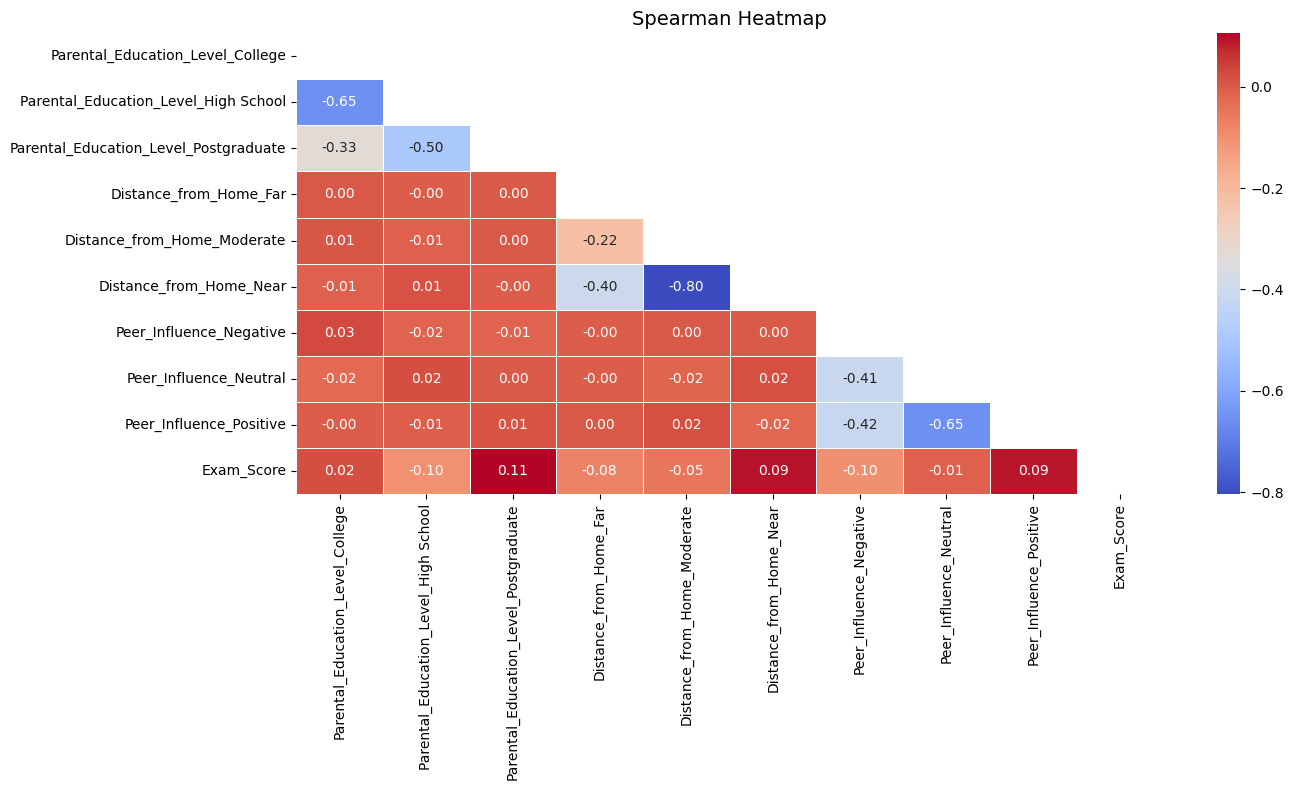

In [173]:
# คำนวณ correlation matrix
corr_matrix = df.drop(columns=['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Physical_Activity', 'Learning_Disabilities', 'Gender']).corr(method='spearman')

# สร้าง heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True ,mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Spearman Heatmap', fontsize=14)
plt.tight_layout()
plt.show()                    


Distance_from_Home_Moderate ,  Peer_Influence_Neutral , Parental_Education_Level_College     
features ทั้งหมดนี้เป็น features ที่มีความสัมพันธ์กับ features     อื่นๆสูง ดังนั้นจะทำการตัดออกเฉพาะ abs|r| > 0.5

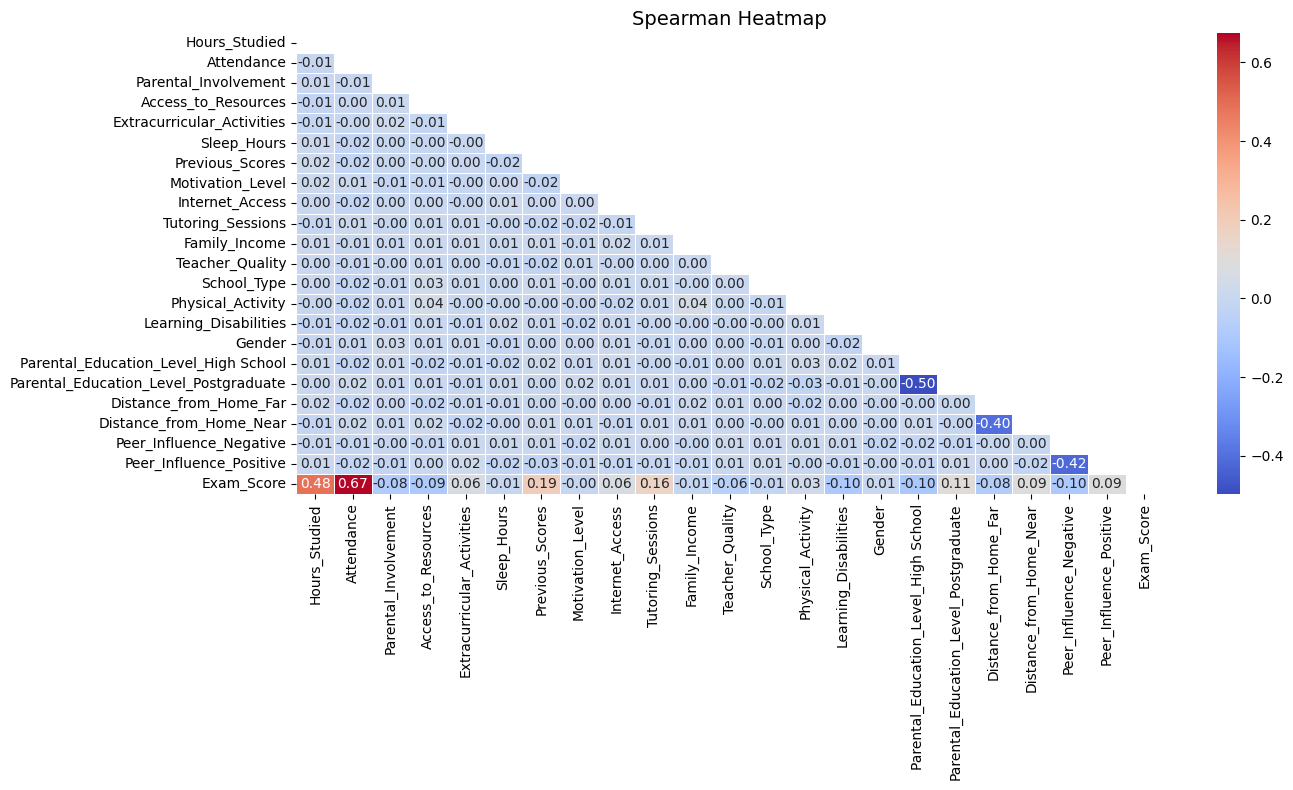

In [174]:
# คำนวณ correlation matrix
corr_matrix = df.drop(columns=['Distance_from_Home_Moderate' , 'Peer_Influence_Neutral' , 'Parental_Education_Level_College']).corr(method='spearman')

# สร้าง heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True ,mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Spearman Heatmap', fontsize=14)
plt.tight_layout()
plt.show()                    

ตัดฟีเจอร์ที่มีความสัมพันธ์สูงๆ

In [175]:
# ลบฟีเจอร์ที่ไม่ต้องการออกจากชุดข้อมูล
features_to_drop_mul = ['Distance_from_Home_Moderate' , 'Peer_Influence_Neutral' , 'Parental_Education_Level_College']

# ลบฟีเจอร์จาก X_train_std และ X_test_std
X_train_std_mul = X_train_std.drop(columns=features_to_drop_mul)
X_test_std_mul = X_test_std.drop(columns=features_to_drop_mul)


จากทั้งหมด มี 25 features เหลือ 22 features

**Train**

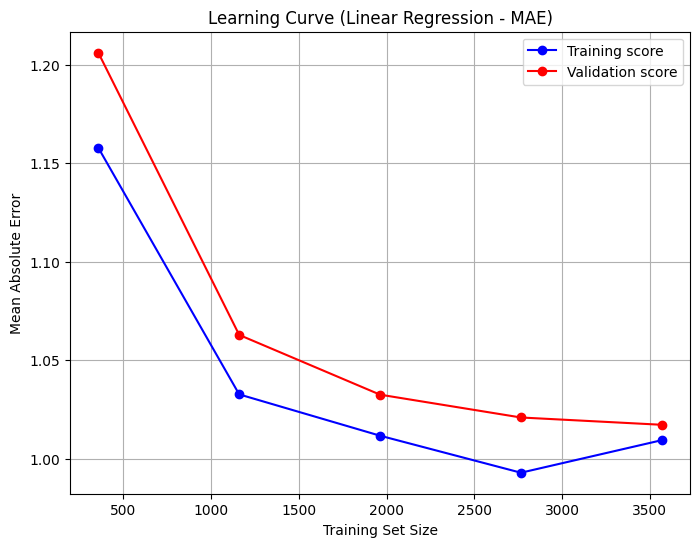

In [176]:
# สร้างโมเดล Linear Regression
linear_mul = LinearRegression()

# Generate learning curve data
train_sizes_linear_mul, train_scores_linear_mul, validation_scores_linear_mul = learning_curve(
    linear, X_train_std_mul, y_train, cv=cv_splitter, scoring='neg_mean_absolute_error', 
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

# Calculate the mean and standard deviation of the scores
train_mean_linear_mul = -train_scores_linear_mul.mean(axis=1)  # Negate since the scoring is negative MAE
validation_mean_linear_mul = -validation_scores_linear_mul.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_linear_mul, train_mean_linear_mul, label="Training score", color="blue",marker='o')
plt.plot(train_sizes_linear_mul, validation_mean_linear_mul, label="Validation score", color="red",marker='o')
plt.title('Learning Curve (Linear Regression - MAE)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend(loc="best")
plt.grid(True)
plt.show()


ไม่เกิดปัญหาใดๆ gap ค่อนข้างไม่ห่างกันมาก good fitting

**Test**

In [177]:
linear_mul.fit(X_train_std_mul,y_train)

train_mae_linear_mul = train_mean_linear_mul[-1]

y_pred_mul = linear_mul.predict(X_test_std_mul)
test_mae_linear_mul = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error train (MAE):", train_mae_linear_mul)
print("Mean absolute Error test (MAE):", test_mae_linear_mul)

Mean absolute Error train (MAE): 1.0094089412189018
Mean absolute Error test (MAE): 1.0187696027182436


แสดงค่า coefficients

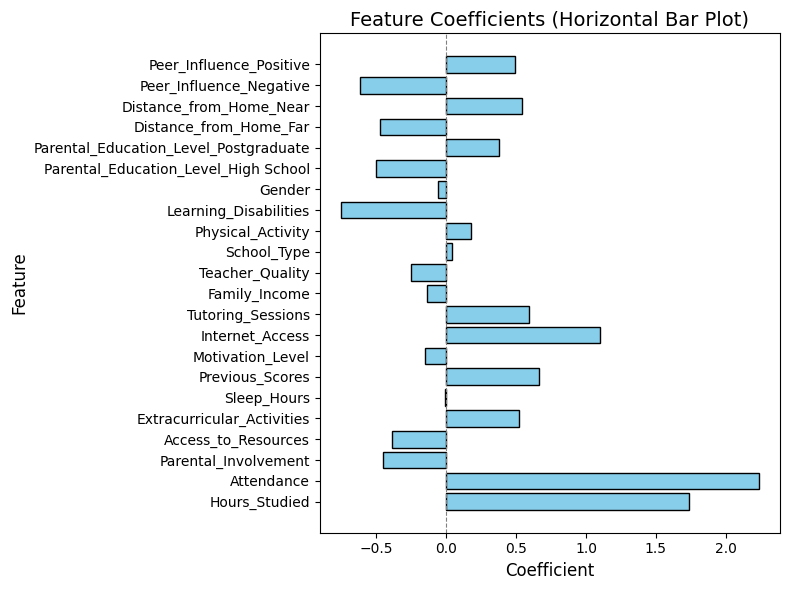

In [178]:
# สร้าง DataFrame สำหรับตาราง
coefficients_linear_mul = linear_mul.coef_

# ลบ Intercept ออกจากฟีเจอร์
coeff_table_linear_mul = pd.DataFrame({
    'Feature': list(X_train_std_mul.columns),
    'Coefficient': coefficients_linear_mul,
})

# สร้างกราฟ Horizontal Bar Plot
plt.figure(figsize=(8, 6))
plt.barh(coeff_table_linear_mul['Feature'], coeff_table_linear_mul['Coefficient'], color='skyblue', edgecolor='black')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # เส้นแกน 0
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Coefficients (Horizontal Bar Plot)', fontsize=14)
plt.tight_layout()
plt.show()

จะเห็นได้ว่าเมื่อ ทำแก้ปัญหา Multicollinearity ออกแล้ว ค่า Coefficicent มีความเป็นปกติมากขึ้น (คำว่าปกติคือไม่มีค่าใดกระโดดสูงเกินไป) 

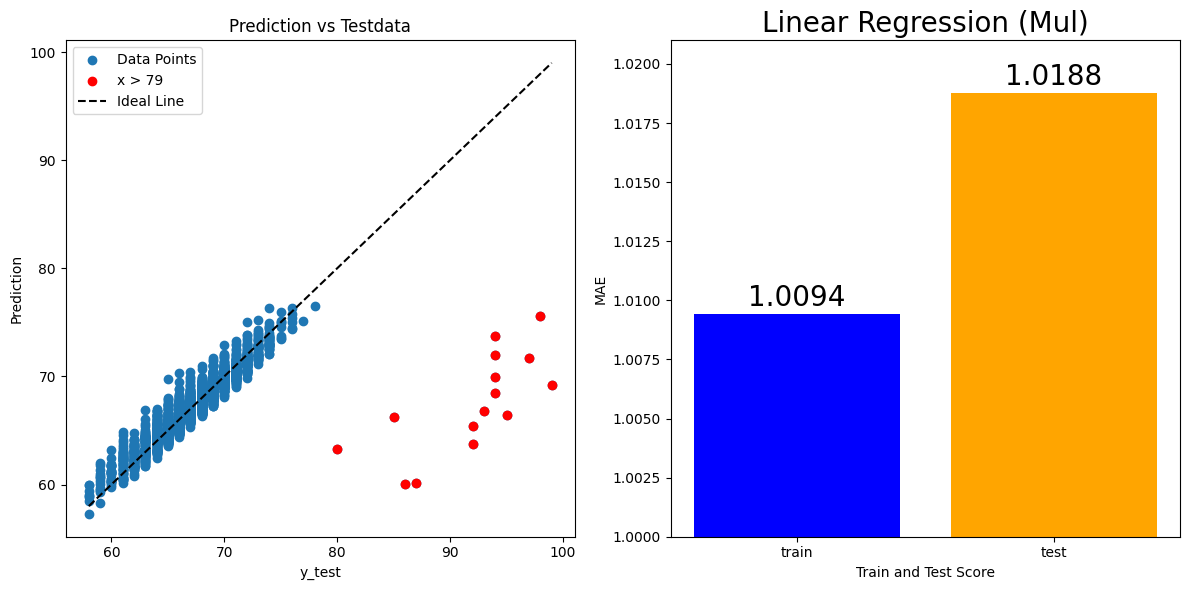

In [179]:
# สร้าง Figure
plt.figure(figsize=(12, 6))

# Plot 1: Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_mul, label='Data Points')
highlight = y_test > 79  # เงื่อนไข x > 79
plt.scatter(y_test[highlight], y_pred_mul[highlight], color='red', label='x > 79')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal Line')
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.title('Prediction vs Testdata')
plt.legend()

# Plot 2: Bar Chart
plt.subplot(1, 2, 2)
bars = plt.bar(['train', 'test'], [train_mae_linear_mul, test_mae_linear_mul], color=['blue', 'orange'])
# เพิ่มเลขบนแต่ละ bar พร้อมกำหนดขนาดฟอนต์
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.4f}', ha='center', va='bottom', fontsize=20)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Linear Regression (Mul)', fontsize=20)
plt.ylim(1.000, 1.021)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


เปรียบเทียบ MAE ของ ก่อนแก้ปัญหา Multicollinearity กับหลังแก้ปัญหา 

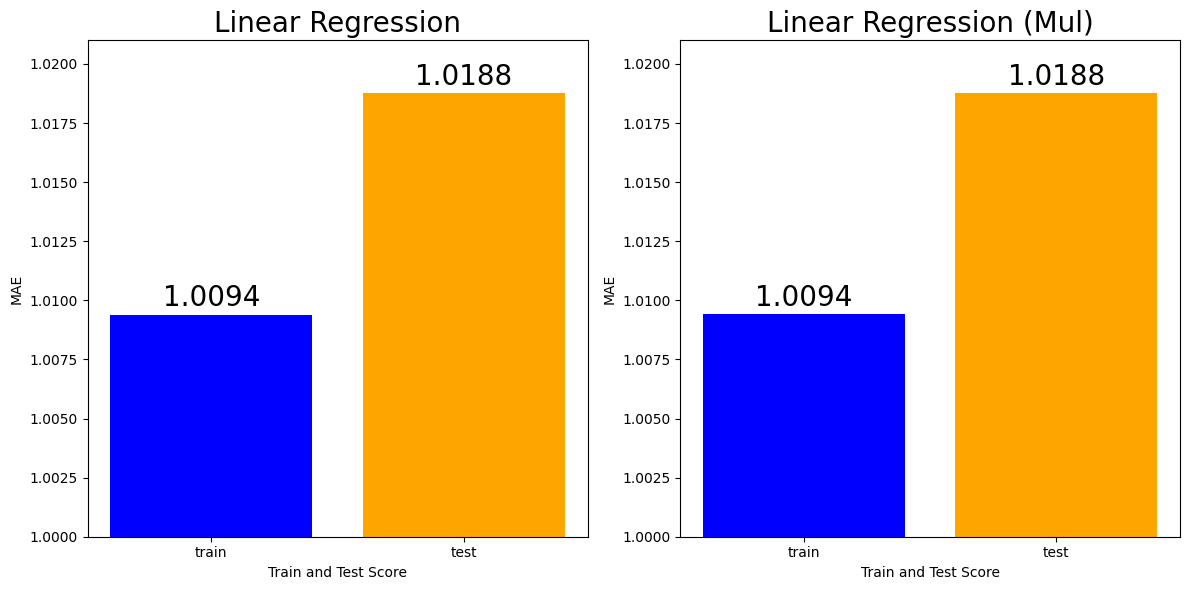

In [180]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

bars = plt.bar(['train', 'test'], [train_mae_linear, test_mae_linear], color=['blue', 'orange'])
# เพิ่มเลขบนแต่ละ bar พร้อมกำหนดขนาดฟอนต์
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.4f}', ha='center', va='bottom', fontsize=20)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Linear Regression', fontsize=20)
plt.ylim(1.000, 1.021)
plt.tight_layout()

# Plot 1: Scatter Plot
plt.subplot(1, 2, 2)
bars = plt.bar(['train', 'test'], [train_mae_linear_mul, test_mae_linear_mul], color=['blue', 'orange'])
# เพิ่มเลขบนแต่ละ bar พร้อมกำหนดขนาดฟอนต์
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.4f}', ha='center', va='bottom', fontsize=20)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Linear Regression (Mul)', fontsize=20)
plt.ylim(1.000, 1.021)
plt.tight_layout()


plt.show()

หลังจากตัด แก้ปัญหาแล้ว MAE ยังดีขึ้นเพราะว่า ทำให้ model จับความสัมพันธ์กับ ฟีเจอร์ที่มีความจำเป็นได้ดีมากยิ่งขึ้น 

จากปัญหา Multicollinearity แล้ว ยังมีปัญหาอีก 1 อย่างคือ
ในช่วงข้อมูลของ 79 - 100 ของ Targets มีข้อมูลค่อนข้างน้อยซึ่งในส่วนที่ model จับไม่ได้คือส่วนนี้  

ทางแก้
เพิ่มข้อมูลด้วยเทคนิคต่างๆ (เป็นไปได้ยาก) ดังนั้นจะลองเพิ่มประสิทธิภาพโมเดลให้เก่งขึ้น 

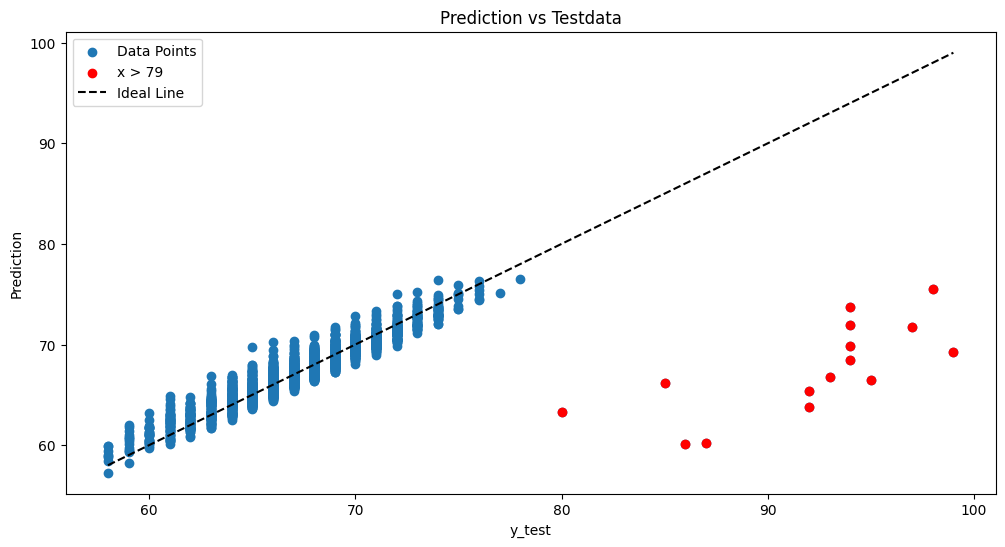

In [181]:
# สร้าง Figure
plt.figure(figsize=(12, 6))

# Plot 1: Scatter Plot
plt.scatter(y_test, y_pred_mul, label='Data Points')
highlight = y_test > 79  # เงื่อนไข x > 79
plt.scatter(y_test[highlight], y_pred_mul[highlight], color='red', label='x > 79')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal Line')
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.title('Prediction vs Testdata')
plt.legend()

# 2.Lasso Regression
Lasso เป็นการปรับปรุงของ Linear Regression โดยการเพิ่ม penalty term (การลงโทษ) ซึ่งช่วยในการเลือกฟีเจอร์ที่มีความสำคัญ โดยการคำนวณ L1 regularization (การลงโทษแบบ L1) ซึ่งทำให้บางฟีเจอร์มีค่า coefficient เท่ากับศูนย์

ซึ่งบางครั้งเราไม่รู้ ฟีเจอร์ที่เราใส่ให้โมเดล เรียนรู้ตัวไหนเอาออกแล้วจะดี หรือเพิ่มเข้าจะดี ซึ่งการที่จะรู้นั้นมีหลายวิธีเช่น backward forward แต่ว่ามันต้องใช้การคำนวณนานมากๆ ดังนั้นจะมาใช้ LASSO แทนเพราะมันจะลด ค่า coefficient ของทุกฟีเจอร์


เมื่อ alpha มาก, การลงโทษจะมากขึ้น ฟีเจอร์ที่ไม่สำคัญจะถูก หักล้าง หรือลดค่าความสำคัญจนเหลือค่า coefficient เป็นศูนย์ ซึ่งทำให้ฟีเจอร์นั้นๆ ถูกตัดออกจากโมเดล.
เมื่อ alpha น้อย, การลงโทษจะน้อยลง โมเดลจะเน้นการ ลดค่า MAE มากขึ้น โดยไม่ตัดฟีเจอร์มากเกินไป

\begin{equation}
\underset{\beta_0, \beta_1, \dots, \beta_p}{\text{minimize}} \left[ \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \left( \beta_0 + \sum_{j=1}^{p} \beta_j x_{ij} \right) \right| + \alpha \sum_{j=1}^{p} \left| \beta_j \right| \right]
\end{equation}

**find best hyperparameter**

In [182]:
base_lasso = Lasso(alpha = 1.0, random_state = 17)

สิ่งที่ต้อง Tune คือ alpha ใช้เทคนิค GridSearch ค้นหา

In [183]:
parameters = {'alpha':[0.000001,0.00001,0.0001,0.001, 0.01 ,0.1, 1, 10 , 100]}

grid_lasso = GridSearchCV(estimator = base_lasso, param_grid = parameters,
                          scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
                          refit = 'neg_mean_absolute_error', cv = cv_splitter)
grid_lasso.fit(X_train_std_mul, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Lasso(random_state=17),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [184]:
grid_lasso_result = pd.DataFrame.from_dict(grid_lasso.cv_results_)
grid_lasso_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.003304      0.000402         0.001228        0.000453     0.000001   
1       0.003199      0.000400         0.001401        0.000491     0.000010   
2       0.002402      0.000493         0.001617        0.000510     0.000100   
3       0.002998      0.000006         0.001199        0.000401     0.001000   
4       0.003600      0.000802         0.001702        0.000397     0.010000   
5       0.003400      0.000491         0.001601        0.000489     0.100000   
6       0.002797      0.000404         0.001201        0.000402     1.000000   
7       0.002600      0.000490         0.001611        0.000477    10.000000   
8       0.002200      0.000400         0.001801        0.000400   100.000000   

              params  split0_test_neg_mean_absolute_error  \
0   {'alpha': 1e-06}                            -1.036032   
1   {'alpha': 1e-05}                            -1.036036   
2  {'alpha': 0.0001}                            -1.036078   
3   {'alpha': 0.001}                            -1.036578   
4    {'alpha': 0.01}                            -1.042621   
5     {'alpha': 0.1}                            -1.223077   
6       {'alpha': 1}                            -2.066759   
7      {'alpha': 10}                            -2.923641   
8     {'alpha': 100}                            -2.923641   

   split1_test_neg_mean_absolute_error  split2_test_neg_mean_absolute_error  \
0                            -1.052557                            -0.979583   
1                            -1.052557                            -0.979588   
2                            -1.052557                            -0.979634   
3                            -1.052583                            -0.980141   
4                            -1.055628                            -0.987143   
5                            -1.215250                            -1.183731   
6                            -1.921868                            -1.965182   
7                            -2.795753                            -2.823289   
8                            -2.795753                            -2.823289   

   split3_test_neg_mean_absolute_error  ...  std_test_neg_mean_absolute_error  \
0                            -1.031183  ...                          0.028862   
1                            -1.031184  ...                          0.028862   
2                            -1.031198  ...                          0.028856   
3                            -1.031351  ...                          0.028803   
4                            -1.036310  ...                          0.028596   
5                            -1.208478  ...                          0.028802   
6                            -1.979577  ...                          0.071247   
7                            -2.850665  ...                          0.066356   
8                            -2.850665  ...                          0.066356   

   rank_test_neg_mean_absolute_error  \
0                                  1   
1                                  2   
2                                  3   
3                                  4   
4                                  5   
5                                  6   
6                                  7   
7                                  8   
8                                  8   

   split0_test_neg_mean_absolute_percentage_error  \
0                                       -0.014604   
1                                       -0.014604   
2                                       -0.014605   
3                                       -0.014612   
4                                       -0.014700   
5                                       -0.017406   
6                                       -0.030111   
7                                       -0.042970   
8                                       -0.042970   

   split1_test_neg_mean_absolute_percentage_error  \
0   

In [185]:
# เรียงลำดับตาม 'rank_test_neg_mean_absolute_error'
grid_lasso_result = grid_lasso_result.sort_values('rank_test_neg_mean_absolute_error')

# แปลง 'mean_test_neg_mean_absolute_error' ให้เป็นบวก
grid_lasso_result['mean_test_neg_mean_absolute_error'] = -grid_lasso_result['mean_test_neg_mean_absolute_error']

# แสดงคอลัมน์ที่ต้องการ
grid_lasso_result[['params', 'mean_test_neg_mean_absolute_error']]

params  mean_test_neg_mean_absolute_error
0   {'alpha': 1e-06}                           1.017147
1   {'alpha': 1e-05}                           1.017149
2  {'alpha': 0.0001}                           1.017170
3   {'alpha': 0.001}                           1.017415
4    {'alpha': 0.01}                           1.022069
5     {'alpha': 0.1}                           1.194830
6       {'alpha': 1}                           1.956608
7      {'alpha': 10}                           2.822895
8     {'alpha': 100}                           2.822895

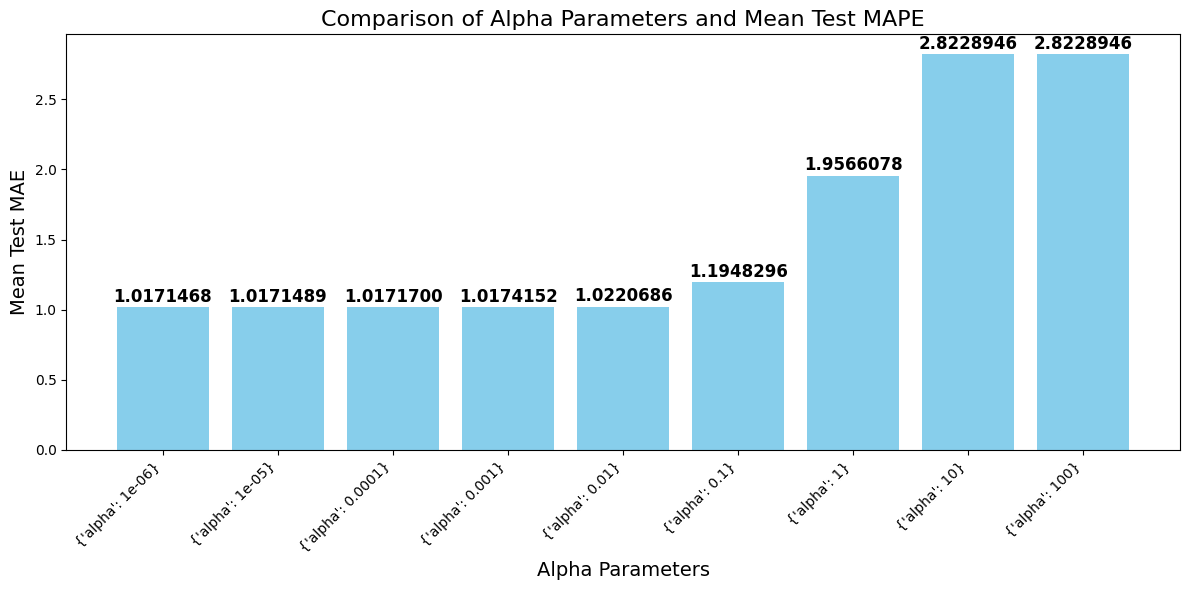

In [186]:
# สร้างกราฟแท่ง
plt.figure(figsize=(12, 6))
bars = plt.bar(grid_lasso_result['params'].astype(str),
               grid_lasso_result['mean_test_neg_mean_absolute_error'], color='skyblue')

# เพิ่มค่าบนแท่ง
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.7f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# เพิ่มชื่อแกน x, y และ title
plt.xlabel('Alpha Parameters', fontsize=14)
plt.ylabel('Mean Test MAE', fontsize=14)
plt.title('Comparison of Alpha Parameters and Mean Test MAPE', fontsize=16)

# แสดงกราฟ
plt.xticks(rotation=45, ha='right')  # หมุนข้อความบนแกน x เพื่อให้ดูง่ายขึ้น
plt.tight_layout()  # ปรับขนาดให้เหมาะสม
plt.show()

best alpha คือ 0.0000001 


**Train**

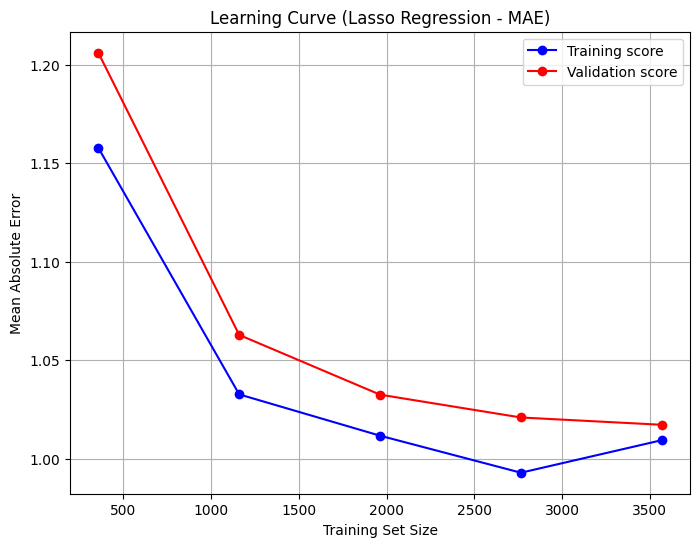

In [187]:
# สร้างโมเดล Lasso กับ alpha = 0.0000006
lasso = Lasso(alpha=0.0000001)

# Generate learning curve data
train_sizes_lasso, train_scores_lasso, validation_scores_lasso = learning_curve(
    lasso, X_train_std_mul, y_train, cv=cv_splitter, scoring='neg_mean_absolute_error', 
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

# คำนวณค่าเฉลี่ยและค่าเบี่ยงเบนมาตรฐานของคะแนน
train_mean_lasso = -train_scores_lasso.mean(axis=1)  # Negate since the scoring is negative MAE
validation_mean_lasso = -validation_scores_lasso.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_lasso, train_mean_lasso, label="Training score", color="blue", marker='o')
plt.plot(train_sizes_lasso, validation_mean_lasso, label="Validation score", color="red", marker='o')
plt.title('Learning Curve (Lasso Regression - MAE)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend(loc="best")
plt.grid(True)
plt.show()

**Test**

In [188]:
lasso.fit(X_train_std_mul,y_train)

train_mae_lasso = train_mean_lasso[-1]

y_pred_LASSO = lasso.predict(X_test_std_mul)
test_mae_lasso = mean_absolute_error(y_test, y_pred_LASSO)
print("Mean absolute Error train (MAE):", train_mae_lasso)
print("Mean absolute Error test (MAE):", test_mae_lasso)

Mean absolute Error train (MAE): 1.0094089681179206
Mean absolute Error test (MAE): 1.01845098883892


เปรียบเทียบ Linear Regression vs Lasso Regression

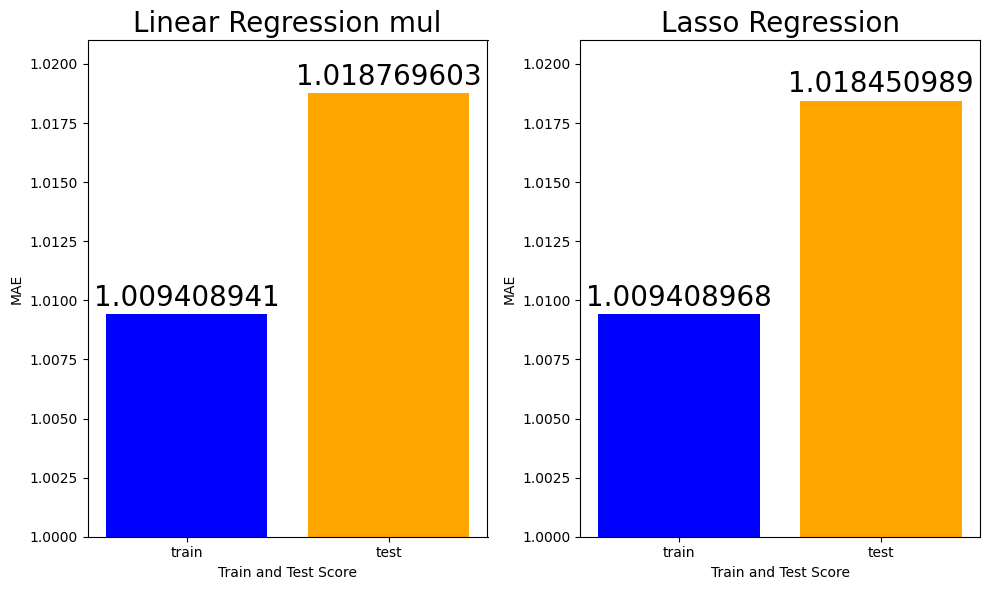

In [189]:

# Plot 5: MAE Comparison for Linear Regression
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(['train', 'test'], [train_mae_linear_mul, test_mae_linear_mul], color=['blue', 'orange'])
# เพิ่มเลขบนแต่ละ bar พร้อมกำหนดขนาดฟอนต์
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.9f}', ha='center', va='bottom', fontsize=20)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Linear Regression mul', fontsize=20)
plt.ylim(1.000, 1.021)

# Adjust layout to avoid overlap
plt.tight_layout()


# Plot 6: MAE Comparison for Lasso Regression
plt.subplot(1, 2, 2)
bars = plt.bar(['train', 'test'], [train_mae_lasso, test_mae_lasso], color=['blue', 'orange'])
# เพิ่มเลขบนแต่ละ bar พร้อมกำหนดขนาดฟอนต์
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.9f}', ha='center', va='bottom', fontsize=20)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Lasso Regression', fontsize=20)
plt.ylim(1.000, 1.021)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

จากที่เห็นเมื่อใช้ LASSO แล้ว MAE ดีขึ้นมาเล็กน้อยซึ่ง   
โดยปกติแล้ว ถ้าเกิดว่า features ในปัจจุบันดีอยู่แล้วหมายถึงว่า ทุกฟีเจอร์มีความสำคัญกับ targets มีผลทำให้ MAE ดีขึ้นทุกฟีเจอร์ ถ้าเอาไปบวกกับ LASSO MAE จะต้องแย่ลงเพราะ LASSO มันไปลด Coefficients ทุก features   

แต่สิ่งที่เกิดขึ้นคือ พอใช้ LASSO MAE กลับดีขึ้นแสดงให้เห็นว่ายังมี features ที่ไม่สำคัญกับ targets หลงเหลืออยู่  
แต่ปัญหาคือแล้วจะรู้ได้อย่างไรว่า เป็นฟีเจอร์ตัวไหน สิ่งหนึ่งที่พอจะเดาได้ก็คือ ตัดฟีเจอร์ coefficients ที่เข้าใกล้ 0 ออกแล้วลอง เรียนรู้โมเดลอีกรอบ

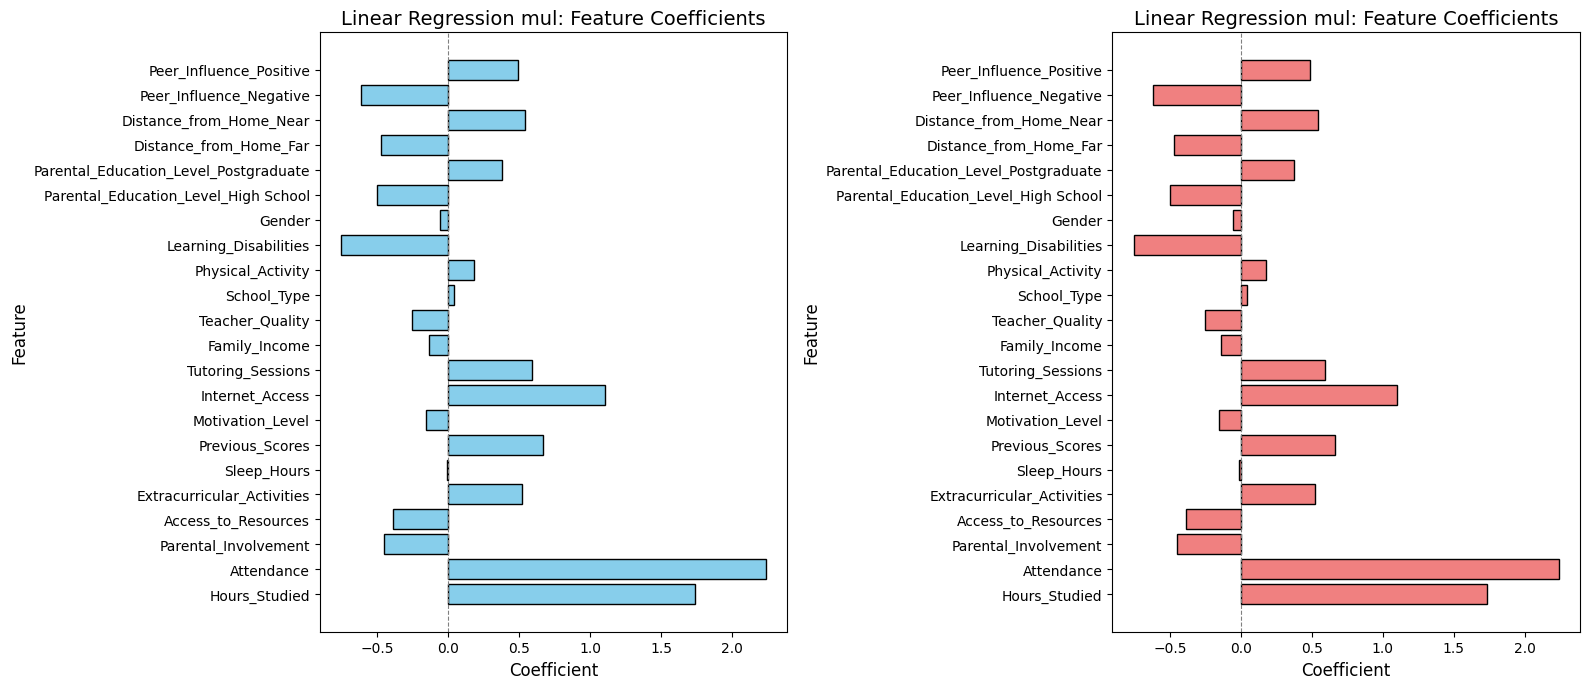

In [190]:
# Create a single figure
plt.figure(figsize=(16, 7))

# Plot 2: Feature Coefficients (Horizontal Bar Plot) for Linear Regression
coefficients_linear_mul = linear_mul.coef_
# ลบ Intercept ออกจากฟีเจอร์
coeff_table_linear_mul = pd.DataFrame({
    'Feature': list(X_train_std_mul.columns),
    'Coefficient': coefficients_linear_mul,
})
plt.subplot(1, 2, 1)
plt.barh(coeff_table_linear_mul['Feature'], coeff_table_linear_mul['Coefficient'], color='skyblue', edgecolor='black')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # เส้นแกน 0
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Linear Regression mul: Feature Coefficients', fontsize=14)
plt.tight_layout()


# Plot 2: Feature Coefficients (Horizontal Bar Plot) for Linear Regression
coefficients_lasso = lasso.coef_
# ลบ Intercept ออกจากฟีเจอร์
coeff_table_lasso = pd.DataFrame({
    'Feature': list(X_train_std_mul.columns),
    'Coefficient': coefficients_lasso,
})
plt.subplot(1, 2, 2)
plt.barh(coeff_table_lasso['Feature'], coeff_table_lasso['Coefficient'], color='lightcoral', edgecolor='black')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # เส้นแกน 0
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Linear Regression mul: Feature Coefficients', fontsize=14)
plt.tight_layout()

plt.show()

Gender, Sleep_Hours , School_Type เป็นฟีเจอร์ coefficient น้อยมากที่สุดจะลองตัดออกแล้วดู MAE อีกรอบ

# 2.1 Evaluation Linear Regression

ตัดฟีเจอร์ที่ coefficients น้อย

In [191]:
# ลบฟีเจอร์ที่ไม่ต้องการออกจากชุดข้อมูล
features_to_drop = ['Gender', 'Sleep_Hours','School_Type','Distance_from_Home_Moderate' , 'Peer_Influence_Neutral' , 'Parental_Education_Level_College']

# ลบฟีเจอร์จาก X_train_std และ X_test_std
X_train_std_eva = X_train_std.drop(columns=features_to_drop)
X_test_std_eva = X_test_std.drop(columns=features_to_drop)

จาก 22 features เหลือ 19 features

**Train**

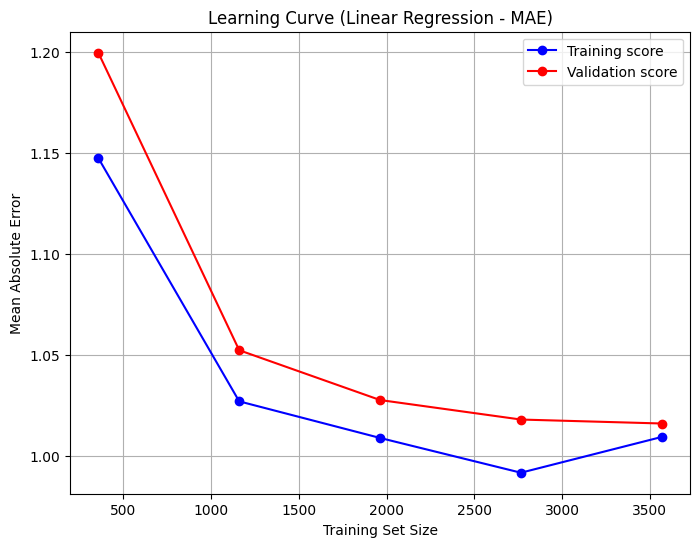

In [192]:
# สร้างโมเดล Linear Regression
linear_eva = LinearRegression()

# Generate learning curve data
train_sizes_linear_eva, train_scores_linear_eva, validation_scores_linear_eva = learning_curve(
    linear, X_train_std_eva, y_train, cv=cv_splitter, scoring='neg_mean_absolute_error', 
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

# Calculate the mean and standard deviation of the scores
train_mean_linear_eva = -train_scores_linear_eva.mean(axis=1)  # Negate since the scoring is negative MAE
validation_mean_linear_eva = -validation_scores_linear_eva.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_linear_eva, train_mean_linear_eva, label="Training score", color="blue",marker='o')
plt.plot(train_sizes_linear_eva, validation_mean_linear_eva, label="Validation score", color="red",marker='o')
plt.title('Learning Curve (Linear Regression - MAE)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend(loc="best")
plt.grid(True)
plt.show()


**Test**

In [193]:
linear_eva.fit(X_train_std_eva,y_train)

train_mae_linear_eva = train_mean_linear_eva[-1]

y_pred_eva = linear_eva.predict(X_test_std_eva)
test_mae_linear_eva = mean_absolute_error(y_test, y_pred_eva)
print("Mean absolute Error train (MAE):", train_mae_linear_eva)
print("Mean absolute Error test (MAE):", test_mae_linear_eva)

Mean absolute Error train (MAE): 1.009257825240943
Mean absolute Error test (MAE): 1.0165854187056729


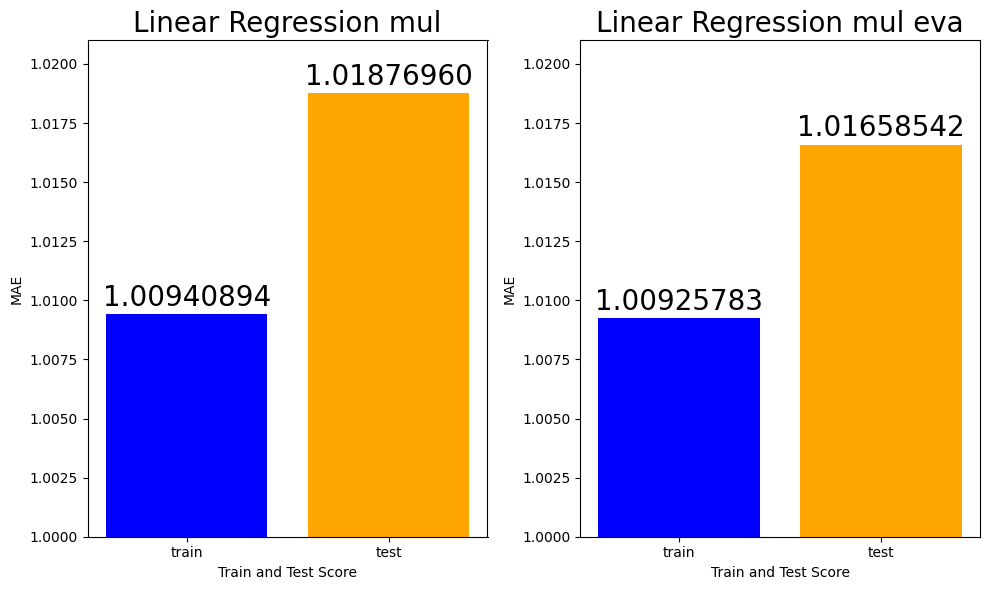

In [194]:

# Plot 5: MAE Comparison for Linear Regression
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(['train', 'test'], [train_mae_linear_mul, test_mae_linear_mul], color=['blue', 'orange'])
# เพิ่มเลขบนแต่ละ bar พร้อมกำหนดขนาดฟอนต์
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.8f}', ha='center', va='bottom', fontsize=20)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Linear Regression mul', fontsize=20)
plt.ylim(1.000, 1.021)

# Adjust layout to avoid overlap
plt.tight_layout()


# Plot 6: MAE Comparison for Lasso Regression
plt.subplot(1, 2, 2)
bars = plt.bar(['train', 'test'], [train_mae_linear_eva, test_mae_linear_eva], color=['blue', 'orange'])
# เพิ่มเลขบนแต่ละ bar พร้อมกำหนดขนาดฟอนต์
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.8f}', ha='center', va='bottom', fontsize=20)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Linear Regression mul eva', fontsize=20)
plt.ylim(1.000, 1.021)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

จะเห็นได้ว่า พอตัด features ที่มี coefficents น้อยมากออกแล้ว MAE ดีขึ้น แสดงว่า features เหล่านั้นไม่สำคัญต่อ Target ของเรา  
ดังนั้น LASSO ก่อนหน้านี้พยายามบ่งบอกว่า มันยังมี features ไม่สำคัญหลงอยู่ ทีนี้ลองใช้ LASSO อีกรอบแล้วดูว่า ถ้าลงโทษแล้วยังจะดีขึ้นมามั้ย 

In [195]:
base_lasso = Lasso(alpha = 1.0, random_state = 19)
parameters = {'alpha':[0.00000000000000001,0.00001,0.0001,0.001, 0.01 ,0.1, 1, 10 , 100]}

grid_lasso = GridSearchCV(estimator = base_lasso, param_grid = parameters,
                          scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
                          refit = 'neg_mean_absolute_error', cv = cv_splitter)
grid_lasso.fit(X_train_std_eva, y_train)

grid_lasso_result = pd.DataFrame.from_dict(grid_lasso.cv_results_)
grid_lasso_result
# เรียงลำดับตาม 'rank_test_neg_mean_absolute_error'
grid_lasso_result = grid_lasso_result.sort_values('rank_test_neg_mean_absolute_error')

# แปลง 'mean_test_neg_mean_absolute_error' ให้เป็นบวก
grid_lasso_result['mean_test_neg_mean_absolute_error'] = -grid_lasso_result['mean_test_neg_mean_absolute_error']

# แสดงคอลัมน์ที่ต้องการ
grid_lasso_result[['params', 'mean_test_neg_mean_absolute_error']]
train_mae_grid_lasso_2 = grid_lasso_result['mean_test_neg_mean_absolute_error'].iloc[0]
print('Train LASSO MAE:', train_mae_grid_lasso_2)

grid_lasso_pred_test = grid_lasso.predict(X_test_std_eva)
test_mae_grid_lasso_2 =mean_absolute_error(y_test, grid_lasso_pred_test)
print('Test LASSO MAE:',test_mae_grid_lasso_2)

c:\Users\ADMIN\anaconda3\envs\non\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.203e+03, tolerance: 4.877e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ADMIN\anaconda3\envs\non\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.002e+03, tolerance: 5.177e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ADMIN\anaconda3\envs\non\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Train LASSO MAE: 1.0158499596583013
Test LASSO MAE: 1.016585418705673


c:\Users\ADMIN\anaconda3\envs\non\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.978e+03, tolerance: 6.409e+00
  model = cd_fast.enet_coordinate_descent(


เปรียบเทียบก่อนหน้านี้ (ตัดฟีเจอร์ออก (Linear eva) กับ LASSO อันใหม่)

In [196]:
if test_mae_grid_lasso_2 <= test_mae_linear_eva:
    print("ยังมี features ที่ไม่สำคัญหลงเหลืออยู่")
else:
    print("features ทั้งหมดในตอนนี้สำคัญหมดแล้ว")

features ทั้งหมดในตอนนี้สำคัญหมดแล้ว


ตอนนี้ ฟีเจอร์ที่อยู่ทั้งหมดนี้ก็สำคัญหมดแล้วใน Linear Regression

เปรียบเทียบทั้งหมดที่ทำมา

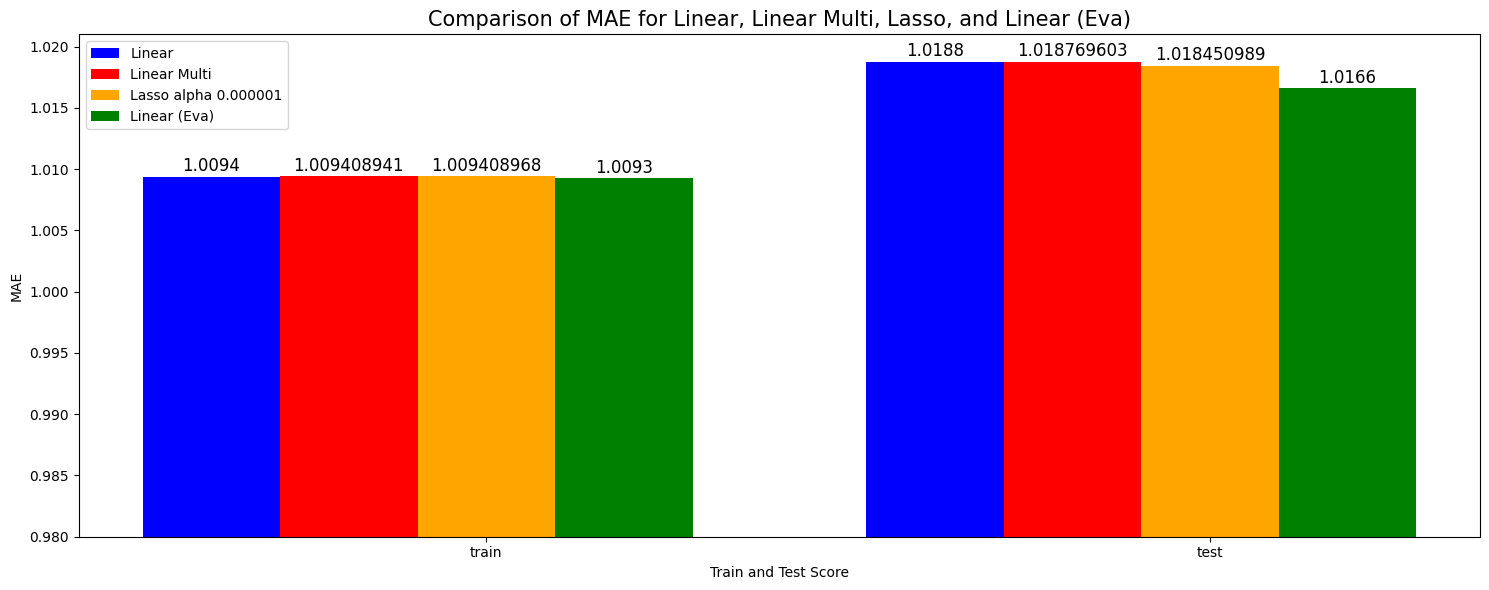

In [197]:
# สร้าง Figure
plt.figure(figsize=(15, 6))

# ตั้งค่า width สำหรับบาร์
bar_width = 0.19  # ลดขนาด bar_width ให้เล็กลง
index = ['train', 'test']

# แสดงกราฟสำหรับ Linear
plt.bar([0 - bar_width * 2, 1 - bar_width * 2], [train_mae_linear, test_mae_linear], width=bar_width, color='blue', label='Linear')
# แสดงกราฟสำหรับ Linear Multi
plt.bar([0 - bar_width, 1 - bar_width], [train_mae_linear_mul, test_mae_linear_mul], width=bar_width, color='red', label='Linear Multi')
# แสดงกราฟสำหรับ Lasso
plt.bar([0, 1], [train_mae_lasso, test_mae_lasso], width=bar_width, color='orange', label='Lasso alpha 0.000001')
# แสดงกราฟสำหรับ Linear Eva
plt.bar([0 + bar_width, 1 + bar_width], [train_mae_linear_eva, test_mae_linear_eva], width=bar_width, color='green', label='Linear (Eva)')

# เพิ่มเลขบนแต่ละ bar
for i, value in enumerate([train_mae_linear, test_mae_linear]):
    plt.text(i - bar_width * 2, value + 0.0001, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate([train_mae_linear_mul, test_mae_linear_mul]):
    plt.text(i - bar_width, value + 0.0001, f'{value:.9f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate([train_mae_lasso, test_mae_lasso]):
    plt.text(i, value + 0.0001, f'{value:.9f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate([train_mae_linear_eva, test_mae_linear_eva]):
    plt.text(i + bar_width, value + 0.0001, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Linear, Linear Multi, Lasso, and Linear (Eva)', fontsize=15)

# ปรับให้แกน X เป็น 'train' และ 'test'
plt.xticks([0, 1], ['train', 'test'])
plt.ylim(0.980, 1.021)

# เพิ่ม Legend
plt.legend()

# ปรับ layout
plt.tight_layout()

# Show the plot
plt.show()

MAE ที่ผ่านการ แก้ปัญหา Multicollinearity กับ ใช้ LASSO พยายามหา features ที่ไม่สำคัญออก
ทำให้ MAE ดีขึ้น (Linear Eva แท่งสีเขียว) 

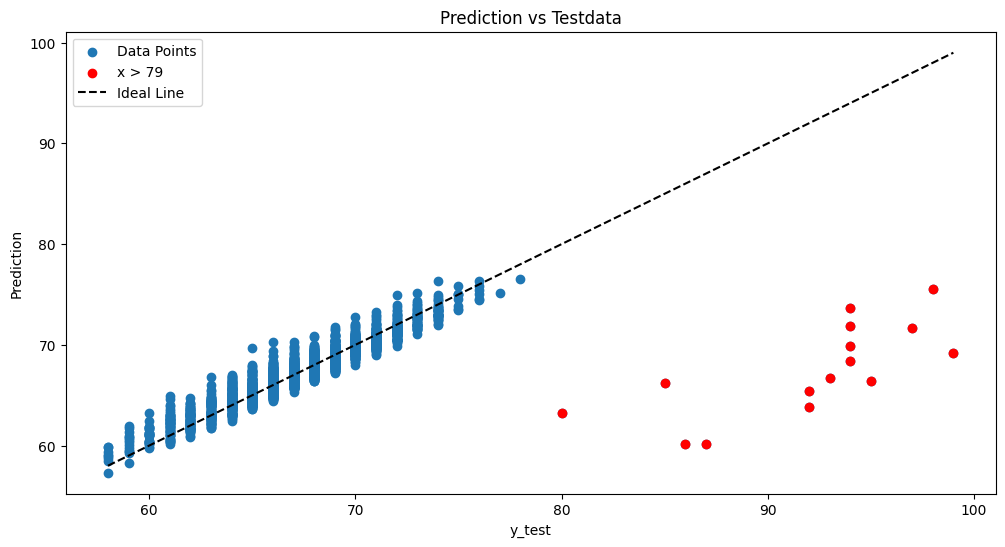

In [198]:
# สร้าง Figure
plt.figure(figsize=(12, 6))

# Plot 1: Scatter Plot
plt.scatter(y_test, y_pred_eva, label='Data Points')
highlight = y_test > 79  # เงื่อนไข x > 79
plt.scatter(y_test[highlight], y_pred_eva[highlight], color='red', label='x > 79')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal Line')
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.title('Prediction vs Testdata')
plt.legend()

แต่ก็ยังไม่สามารถแก้ปัญหา target ในช่วง 79 - 100 ที่ข้อมูลยังน้อยๆได้ ทางแก้ก็เหมือนเดิมทำให้ model เก่งขึ้น

# 3.Polynomial Regression

\begin{equation}
\text{Linear Regression ธรรมดา:             } 
y = \beta_0 + \beta_1 x 
\end{equation}

\begin{equation}
\text{Linear Regression พร้อม Polynomial Terms (Degree 2):               } 
y = \beta_0 + \beta_1 x + \beta_2 x^2
\end{equation}



Polynomial Regression เป็นเทคนิคที่ใช้เพื่อแปลง Linear Regression ให้สามารถสร้างความสัมพันธ์แบบ non-linear ได้ โดยการเพิ่ม พหุนาม (polynomial terms) ของตัวแปรอิสระ (independent variable) เข้าไปในโมเดล ซึ่งการยกกำลังจะทำให้แปลงจากเส้นตรง สามารถมีการโค้งของเส้น predict เพราะเราไม่รู้ว่า หน้าตาข้อมูลของเรามันเป็นแบบไหน

**find best hyperparameter**

In [199]:
# Polynomial degrees to try
# degrees = [1,2]
degrees = [1,2,3,4,5] #รันนานมาก รันใน VScode ใช้ GPU

# Initialize lists to store MAE for train and test
mae_train_list = []
mae_test_list = []

# Iterate over degrees
for degree in degrees:
    # Create a pipeline with polynomial features and linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Perform cross-validation using the provided cv_splitter
    cv_results = cross_validate(model, X_train_std_eva, y_train, cv=cv_splitter, 
                                scoring='neg_mean_absolute_error', return_train_score=True)
    
    # Calculate the mean MAE for train and test sets from cross-validation results
    mae_train = -np.mean(cv_results['train_score'])  # Convert from negative to positive MAE
    mae_test = -np.mean(cv_results['test_score'])  # Convert from negative to positive MAE
    
    # Append the MAE values to the lists
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)



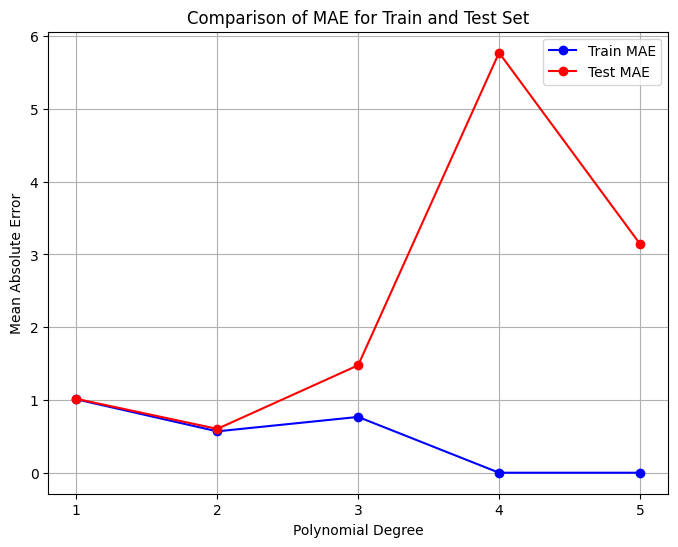

In [200]:
# Plotting the MAE for train and test on the same graph
plt.figure(figsize=(8, 6))

# Plot both train and test MAE
plt.plot(degrees, mae_train_list, marker='o', color='b', label='Train MAE')
plt.plot(degrees, mae_test_list, marker='o', color='r', label='Test MAE')

# Adding labels and title
plt.title('Comparison of MAE for Train and Test Set')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.legend()
plt.xticks(degrees)

# Show the plot
plt.show()


best parameter ดีสุด คือ degree = 2 เพราะว่าหลังจาก degree 2 มีแนวโน้มที่จะ Overfitting คือ train ดีมากๆ แต่ test แย่ลงมากๆ

**Train**

c:\Users\ADMIN\anaconda3\envs\non\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


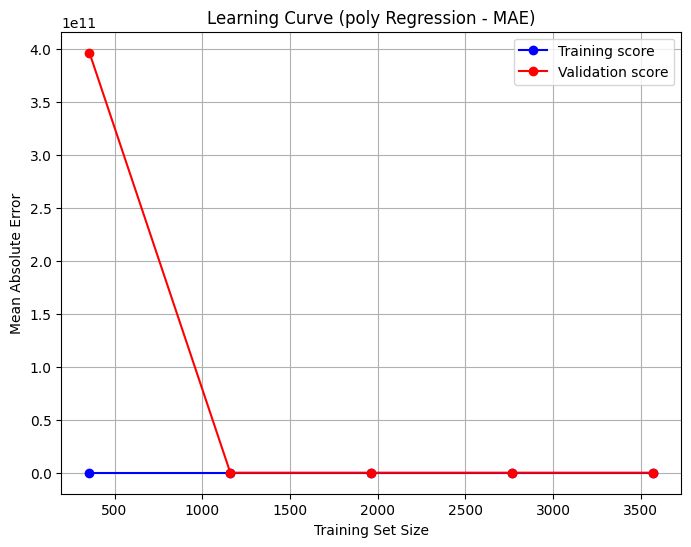

In [201]:
#เอา degree 2 
poly = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Generate learning curve data
train_sizes_poly, train_scores_poly, validation_scores_poly = learning_curve(
    poly, X_train_std_mul, y_train, cv=cv_splitter, scoring='neg_mean_absolute_error', 
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

# คำนวณค่าเฉลี่ยและค่าเบี่ยงเบนมาตรฐานของคะแนน
train_mean_poly = -train_scores_poly.mean(axis=1)  # Negate since the scoring is negative MAE
validation_mean_poly = -validation_scores_poly.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_poly, train_mean_poly, label="Training score", color="blue", marker='o')
plt.plot(train_sizes_poly, validation_mean_poly, label="Validation score", color="red", marker='o')
plt.title('Learning Curve (poly Regression - MAE)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend(loc="best")
plt.grid(True)
plt.show()

Very good fitting เลยเพราะว่า validation score = Traning score แสดงว่าทำนายได้แม่นยำมากๆ พอๆกับ ตอน เรียนรู้

**Test**

In [202]:
poly.fit(X_train_std_mul,y_train)

train_mae_poly = train_mean_poly[-1]

y_pred_poly = poly.predict(X_test_std_mul)
test_mae_poly = mean_absolute_error(y_test, y_pred_poly)
print("Mean absolute Error train (MAE):", train_mae_poly)
print("Mean absolute Error test (MAE):", test_mae_poly)

Mean absolute Error train (MAE): 0.5985065900645001
Mean absolute Error test (MAE): 0.627124690208769


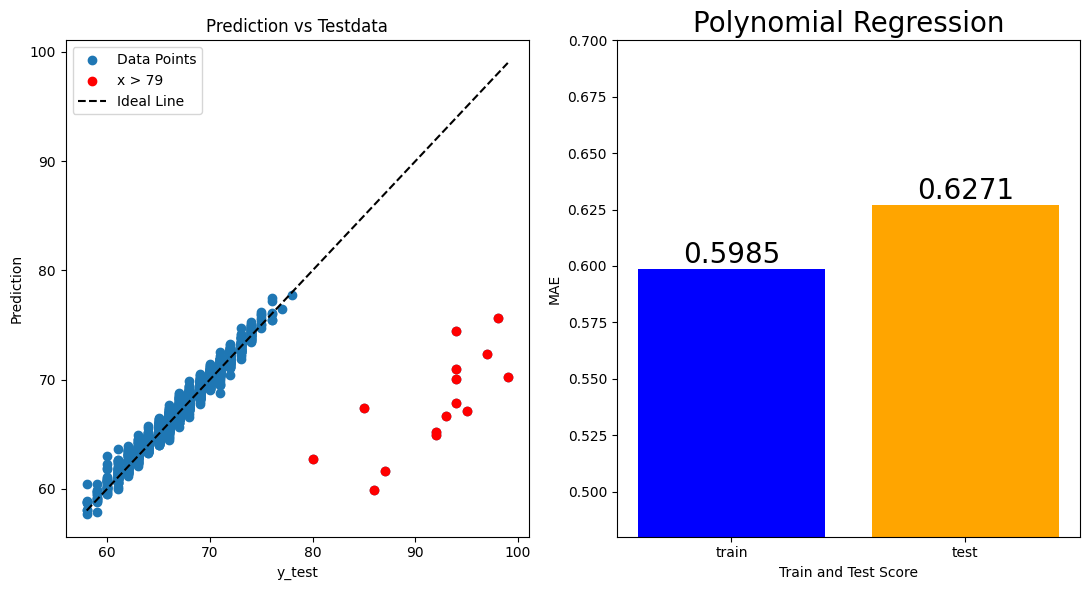

In [203]:
# สร้าง Figure
plt.figure(figsize=(11, 6))

# Plot 1: Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_poly, label='Data Points')
highlight = y_test > 79  # เงื่อนไข x > 79
plt.scatter(y_test[highlight], y_pred_poly[highlight], color='red', label='x > 79')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal Line')
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.title('Prediction vs Testdata')
plt.legend()

# Plot 2: Bar Chart
plt.subplot(1, 2, 2)
bars = plt.bar(['train', 'test'], [train_mae_poly, test_mae_poly], color=['blue', 'orange'])
# เพิ่มเลขบนแต่ละ bar พร้อมกำหนดขนาดฟอนต์
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.4f}', ha='center', va='bottom', fontsize=20)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Polynomial Regression', fontsize=20)
plt.ylim(0.48, 0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

จะเห็นได้ว่าก็ยังไม่สามารถแก้ไข target ข้อมูลในช่วง 79 - 100 ไม่สามารถทำนายได้ดีได้

เปรียบเทียบ MAE ของ Curve fitting ทั้งหมดที่ทำมา

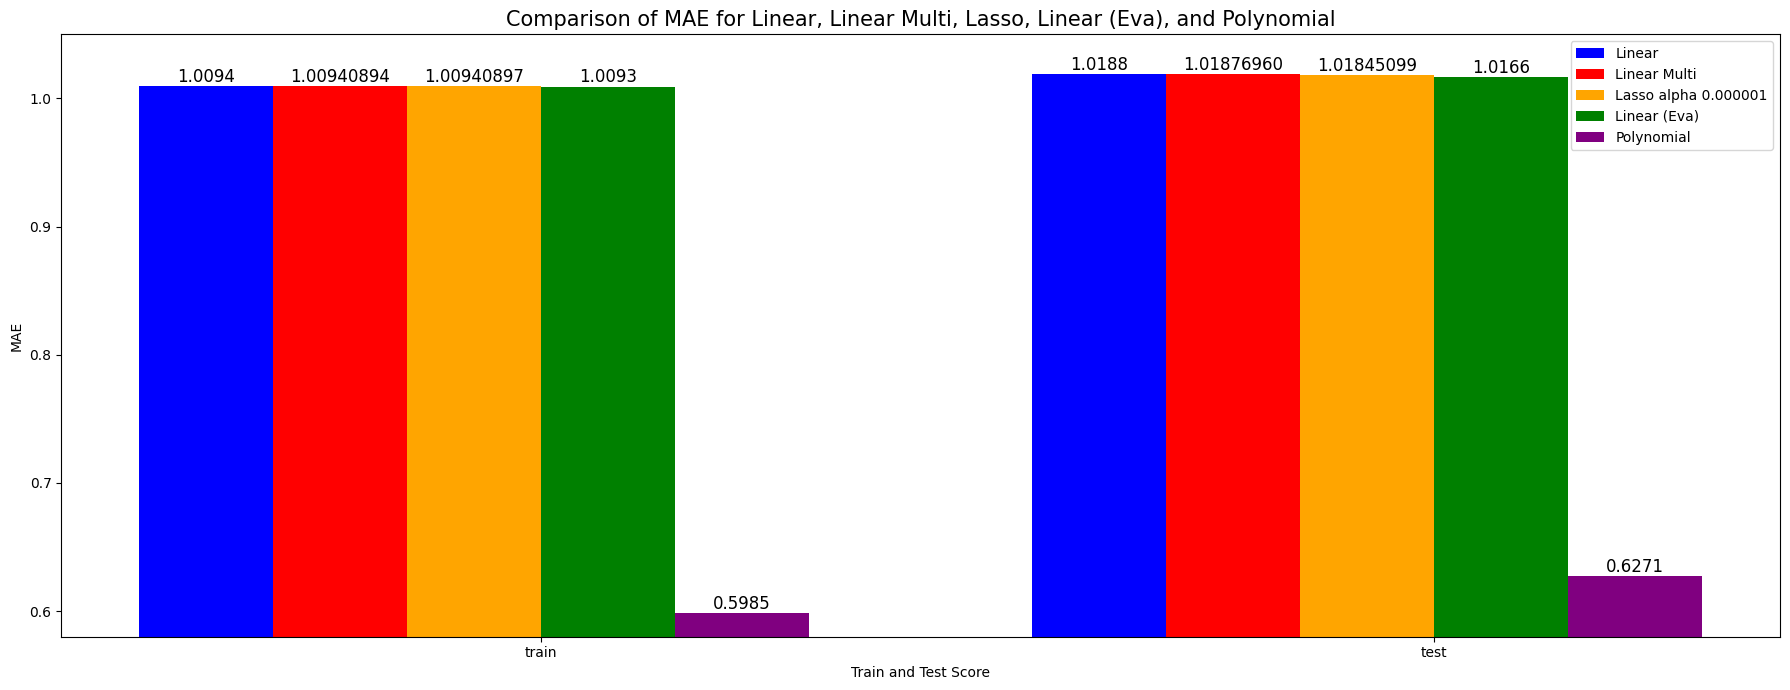

In [204]:
# สร้าง Figure
plt.figure(figsize=(18, 7))

# ตั้งค่า width สำหรับบาร์
bar_width = 0.15  # ลดขนาด bar_width ให้เล็กลง
index = ['train', 'test']

# แสดงกราฟสำหรับ Linear
plt.bar([0 - bar_width * 2.5, 1 - bar_width * 2.5], [train_mae_linear, test_mae_linear], width=bar_width, color='blue', label='Linear')
# แสดงกราฟสำหรับ Linear Multi
plt.bar([0 - bar_width * 1.5, 1 - bar_width * 1.5], [train_mae_linear_mul, test_mae_linear_mul], width=bar_width, color='red', label='Linear Multi')
# แสดงกราฟสำหรับ Lasso
plt.bar([0 - bar_width * 0.5, 1 - bar_width * 0.5], [train_mae_lasso, test_mae_lasso], width=bar_width, color='orange', label='Lasso alpha 0.000001')
# แสดงกราฟสำหรับ Linear Eva
plt.bar([0 + bar_width * 0.5, 1 + bar_width * 0.5], [train_mae_linear_eva, test_mae_linear_eva], width=bar_width, color='green', label='Linear (Eva)')
# แสดงกราฟสำหรับ Polynomial
plt.bar([0 + bar_width * 1.5, 1 + bar_width * 1.5], [train_mae_poly, test_mae_poly], width=bar_width, color='purple', label='Polynomial')

# เพิ่มเลขบนแต่ละ bar
for i, value in enumerate([train_mae_linear, test_mae_linear]):
    plt.text(i - bar_width * 2.5, value + 0.0001, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate([train_mae_linear_mul, test_mae_linear_mul]):
    plt.text(i - bar_width * 1.5, value + 0.0001, f'{value:.8f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate([train_mae_lasso, test_mae_lasso]):
    plt.text(i - bar_width * 0.5, value + 0.0001, f'{value:.8f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate([train_mae_linear_eva, test_mae_linear_eva]):
    plt.text(i + bar_width * 0.5, value + 0.0001, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate([train_mae_poly, test_mae_poly]):
    plt.text(i + bar_width * 1.5, value + 0.0001, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Linear, Linear Multi, Lasso, Linear (Eva), and Polynomial', fontsize=15)

# ปรับให้แกน X เป็น 'train' และ 'test'
plt.xticks([0, 1], ['train', 'test'])
plt.ylim(0.58,1.05)  # ขยายขอบเขตของแกน Y

# เพิ่ม Legend
plt.legend()

# ปรับ layout
plt.tight_layout()

# Show the plot
plt.show()

พอแปลงเป็น non-linear ทำให้สามารถทำนายข้อมูลได้ดีขึ้นอย่างเห็นได้ชัด กับ dataset ชุดนี้

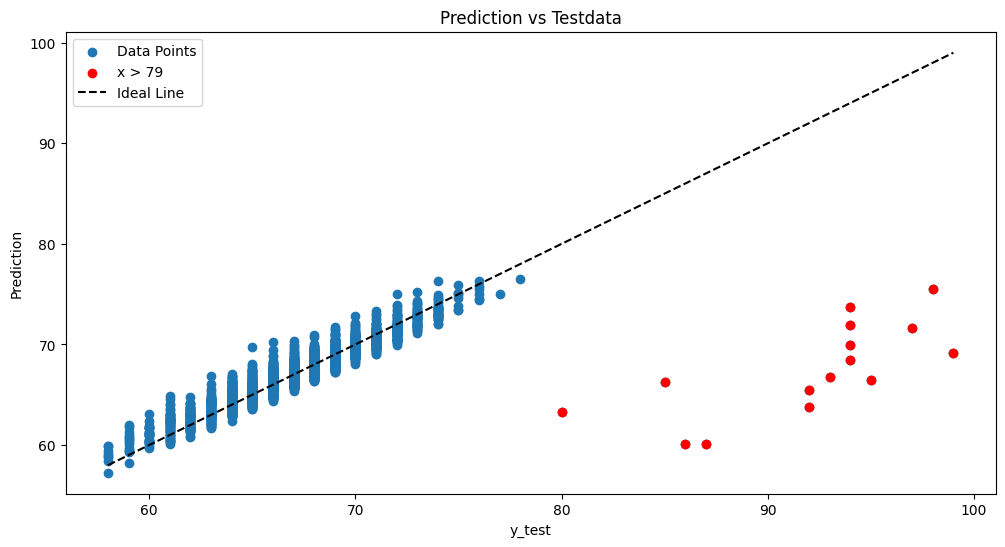

In [205]:
# สร้าง Figure
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label='Data Points')
highlight = y_test > 79  # เงื่อนไข x > 79
plt.scatter(y_test[highlight], y_pred[highlight], color='red', label='x > 79')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal Line')
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.title('Prediction vs Testdata')
plt.legend()

สิ่งที่ดีขึ้นคือ ข้อมูลในช่วงอื่นๆที่ผ่านมาแต่ข้อมูลในช่วง 79 - 100 ก็ยังเหมือนเดิมไม่สามารถทำนายได้ดีขึ้น  
จะลองใช้ model ตัวอื่น

# Tree models  
โมเดลในรูปแบบของต้นไม้ตัดสินใจ โดยจะใช้ Regressor ซึ่ง เกณฑ์ในการแบ่งของ node อยากให้มีความแปรปรวนของข้อมูลช่วงที่แบ่งน้อยมากที่สุด (Variance Reduction)

# 1.GradientBoostingRegressor

เป็นการเรียนรู้สิ่งที่ model ทำนายผิดพลาดเป็นเทคนิคที่เรียกว่า Boosting และนำ model หลายๆอันมาประกอบกัน

หลักการทำงานของ GradientBoostingRegressor หลักๆ:   
1.เริ่มต้นด้วย Linear Regression:
ใน sklearn ของ GradientBoostingRegressor จะเริ่มต้นด้วยการใช้ ค่าเฉลี่ยของ Target หรือประมาณการด้วย Linear Regression ก่อน ซึ่งจะได้ Residuals (ความผิดพลาดระหว่างค่าทำนายและค่าจริง)

2.สร้าง Decision Tree:
โมเดลจะสร้าง Decision Tree ที่มุ่งเน้นทำนาย Residuals แทนที่จะทำนาย Target เดิม ซึ่งจะช่วยให้การทำนายในรอบถัดไปดีขึ้น โดย Decision Tree จะเลือก split หรือการแบ่ง node โดยใช้หลัก Variance Reduction เพื่อหาการแบ่งที่ลดความแปรปรวนของข้อมูลในแต่ละ node ได้ดีที่สุด

3.ปรับปรุงทำนาย:
หลังจากสร้าง Decision Tree แล้ว จะนำผลการทำนายจากต้นไม้ใหม่นี้มาปรับปรุงผลทำนายของโมเดล โดยจะมี Learning Rate ที่ช่วยควบคุมว่าในแต่ละรอบโมเดลจะเชื่อในผลทำนายที่ได้จากต้นไม้ใหม่มากน้อยแค่ไหน

4.ทำซ้ำ:
กระบวนการนี้จะทำซ้ำจนกว่าจะถึงจำนวนต้นไม้ที่กำหนด หรือจนกว่าจะได้ค่าความผิดพลาดที่ลดลงอย่างมีนัยสำคัญ

และที่สำคัญ GradidentBoostingRegreessor มี Cross validation ในตัวเองในการประเมินต้นไม้ทีละต้น   
และมี learning curve ของต้นไม้แต่ละต้น ที่จะแสดงว่าในแต่ละต้นไม้ มี train score , validation score 
gap เป็นอย่างไร 

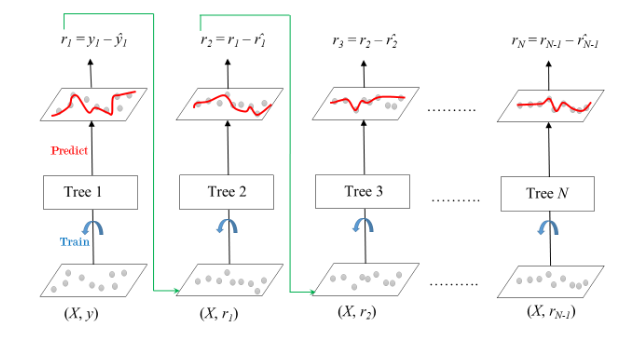

อ้างอิง : https://www.geeksforgeeks.org/ml-gradient-boosting/

จากภาพจะเห็นได้ว่า ในแต่ละต้นไม้วัดผลออกมาแล้ว ก็จะมี Error อยู่จากนั้นจะเอา Error ไปทำนายต่อโดยการสร้าง model ต้นไม้ขึ้นมาใหม่ ทำซ้ำไปเรื่อยๆ ตามที่เราจูน

\begin{equation}

F_M(x) = F_0(x) + \sum_{m=1}^{M} \nu \cdot h_m(x)

\end{equation}


**Train and test and find best hyperparameter**   
ในการจูนโมเดลต้นไม้ ถ้าใช้ grid search อาจจะต้องใช้เวลานาน ดังนั้นจะลอง จูนด้วยมือโดยไล่ โดย lock    
learning_rate = 0.1 , n_estimators = 30000 , validation_fraction = 0.2 , subsample = 0.9 , n_iter_no_change=None

Train MAE: 0.4241478481174451
Test MAE after Early Stopping: 0.4614687076766985


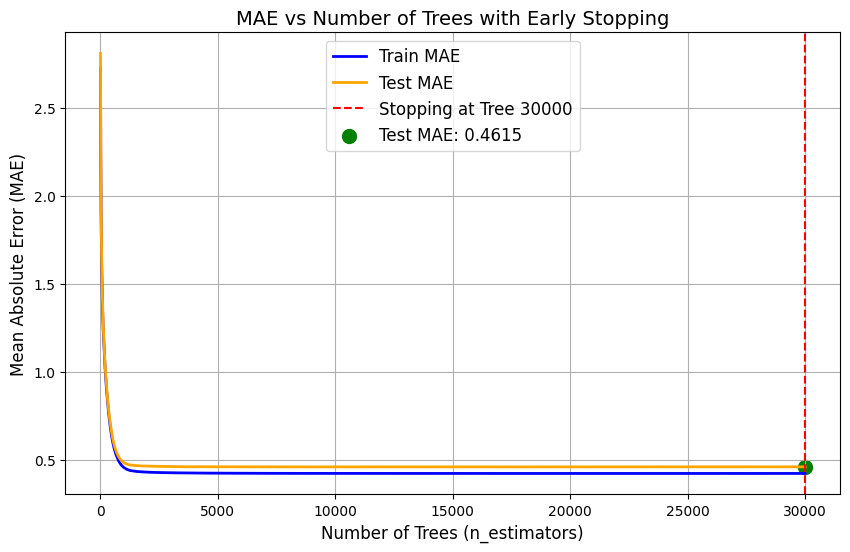

In [ ]:
# ตั้งค่าโมเดลพร้อม Early Stopping
Ga_early = GradientBoostingRegressor(
    learning_rate=0.1,                  #ความเชื่อมั่นโมเดลก่อนหน้าว่าทำนายได้ดีเท่าไหร่
    max_depth=1,                        #ความลึกของต้นไม้
    n_estimators=30000,                #จำนวนต้นไม้ที่ฝึก
    subsample=0.9,                      #จะเลือกใช้ข้อมูลเฉพาะบางส่วน (สุ่ม) สำหรับการฝึกในแต่ละรอบ ซึ่งจะช่วยลดการ overfitting
    validation_fraction=0.2,            #ทำ cross ทุกรอบแบ่งให้เรียน 5%
    n_iter_no_change=None,              #ไม่ปรับให้เรียนเรื่อยจนครบต้นไม้ที่กำหนด
    random_state=2,                     #2 ตัวเลขสุ่ม
    min_samples_split=10,               # ต้องมี sample มากกว่า 10 ถึงจะยอมแบ่ง
    min_samples_leaf=15,                # leaf node ที่ถูกสร้างขึ้นจะต้องมีข้อมูลอย่างน้อย n ตัวอย่างก่อนที่จะสามารถสร้างได้
    max_features=10,                    # ทั้งหมดเรามี 19 ฟีเจอร์ ณ ปัจจุบัน
    loss='huber'                        # huber (Mix MAE MSE)
)

# ฝึกโมเดล
Ga_early.fit(X_train_std_eva, y_train)

# ทำนายบน train และ test set
y_train_pred = Ga_early.predict(X_train_std_eva)
y_test_pred = Ga_early.predict(X_test_std_eva)

# คำนวณ MAE สำหรับ train และ test
mae_train_gbr = mean_absolute_error(y_train, y_train_pred)
mae_test_gbr = mean_absolute_error(y_test, y_test_pred)
mse_train_gbr = mean_squared_error(y_train, y_train_pred)
mse_test_gbr = mean_squared_error(y_test, y_test_pred)
r2_train_gbr = r2_score(y_train, y_train_pred)
r2_test_gbr = r2_score(y_test, y_test_pred)

# แสดงผล MAE
print(f"Train MAE: {mae_train_gbr}")
print(f"Test MAE after Early Stopping: {mae_test_gbr}")

# เก็บค่า MAE สำหรับแต่ละต้นไม้
mae_train_list = []
mae_test_list = []


# ใช้ staged_predict เพื่อคำนวณค่า MAE หลังจากสร้างต้นไม้แต่ละต้น
for y_train_pred_stage, y_test_pred_stage in zip(Ga_early.staged_predict(X_train_std_eva), Ga_early.staged_predict(X_test_std_eva)):
    mae_train_list.append(mean_absolute_error(y_train, y_train_pred_stage))
    mae_test_list.append(mean_absolute_error(y_test, y_test_pred_stage))


# กราฟ MAE พร้อมจุด Early Stopping
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mae_train_list) + 1), mae_train_list, label="Train MAE", color="blue", linewidth=2)
plt.plot(range(1, len(mae_test_list) + 1), mae_test_list, label="Test MAE", color="orange", linewidth=2)

# Highlight จุดหยุด Early Stopping
n_trees_used = Ga_early.n_estimators_
plt.axvline(x=n_trees_used, color="red", linestyle="--", label=f"Stopping at Tree {n_trees_used}")

# Highlight ค่า Test MAE หลัง Early Stopping
plt.scatter(n_trees_used, mae_test_gbr, color="green", label=f"Test MAE: {mae_test_gbr:.4f}", s=100)

plt.xlabel("Number of Trees (n_estimators)", fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
plt.title("MAE vs Number of Trees with Early Stopping", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

ข้อดีของ Tree model สามารถดู feature_importances ได้ว่า features ไหนลด variance ได้ดีสุด

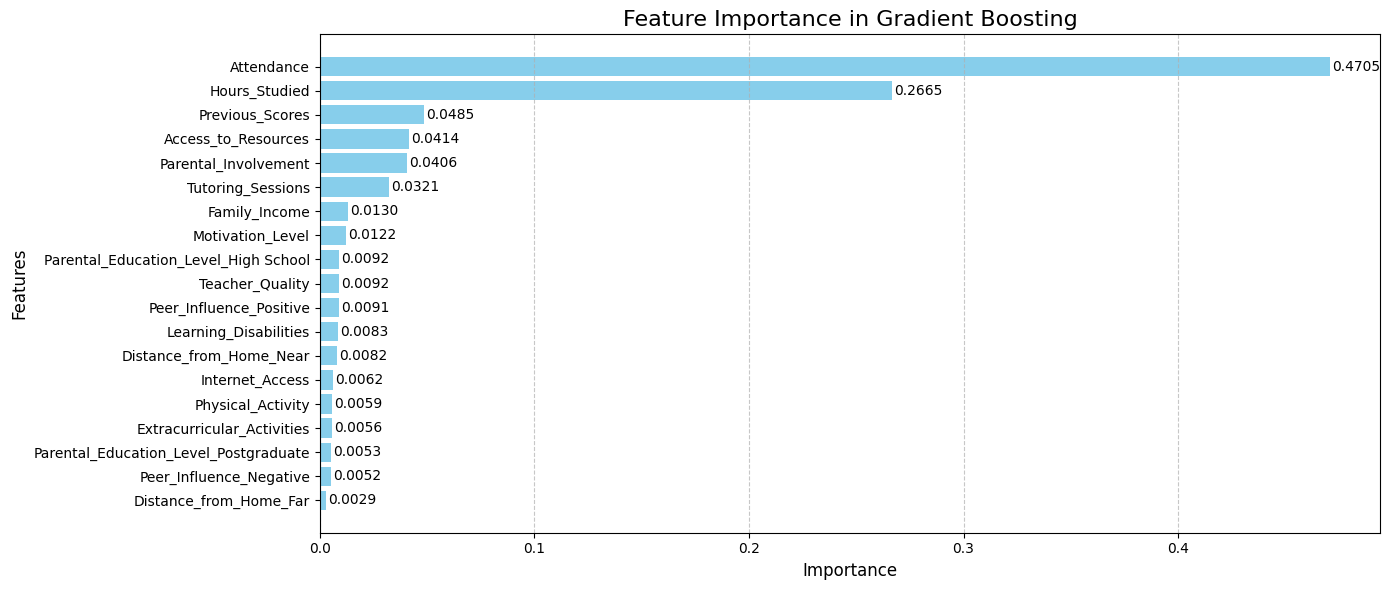

In [207]:
feature_importance  = Ga_early.feature_importances_
# สร้าง DataFrame สำหรับจัดอันดับ
importance_df = pd.DataFrame({
    'Feature': X_test_std_eva.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=True)  # เรียงจากน้อยไปมากสำหรับ barh

# Plot Feature Importance (barh)
plt.figure(figsize=(14, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

# เพิ่มค่าเลขบนกราฟ
for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.4f}', va='center', fontsize=10)

# ตั้งค่ากราฟ
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Gradient Boosting', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# แสดงกราฟ
plt.show()

สังเกต Attendance , Hours_Studied สูงเป็นพิเศษ ซึ่งตอนที่ทำ Linear Regression ค่า Coefficients ทั้ง 2 อันนี้ก็สูงเช่นกัน

เปรียบเทียบ MAE ของ best curvefitting กับ best tree model

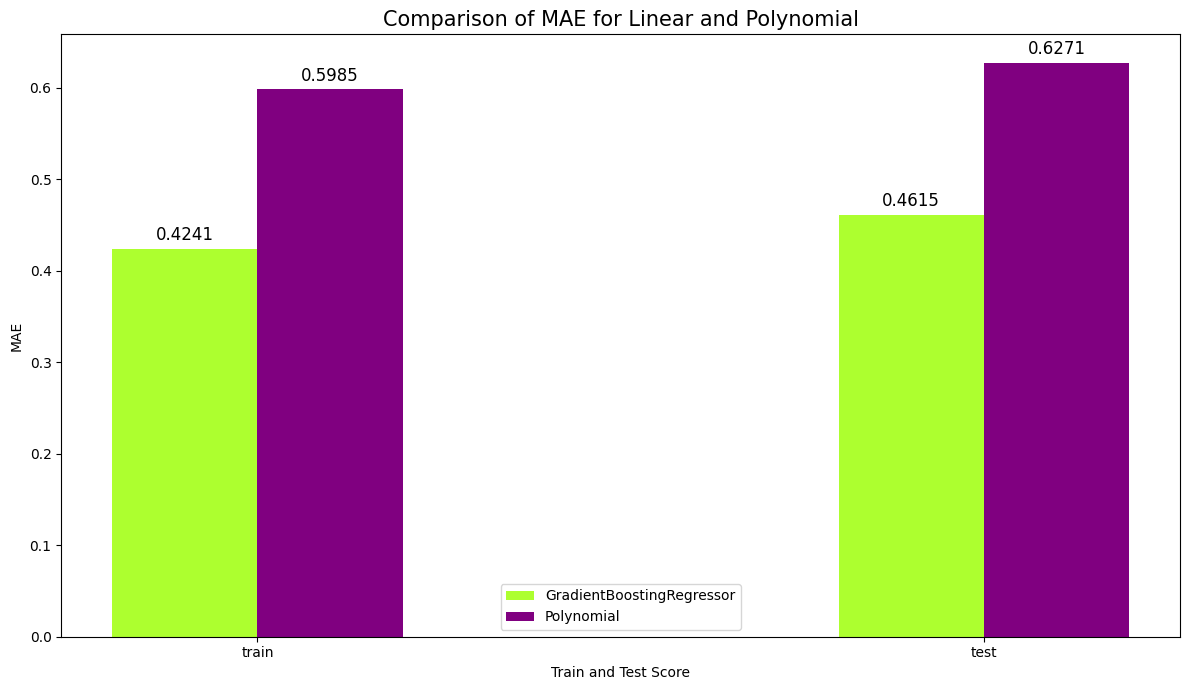

In [208]:
# สร้าง Figure
plt.figure(figsize=(12, 7))

# ตั้งค่า width สำหรับบาร์
bar_width = 0.2  # เพิ่มขนาดเล็กลงให้เหมาะสม
index = [0, 1]  # ตำแหน่งแกน X สำหรับ train และ test

# แสดงกราฟสำหรับ Linear
plt.bar([i - bar_width / 2 for i in index], [mae_train_gbr, mae_test_gbr], width=bar_width, color='greenyellow', label='GradientBoostingRegressor')

# แสดงกราฟสำหรับ Polynomial
plt.bar([i + bar_width / 2 for i in index], [train_mae_poly, test_mae_poly], width=bar_width, color='purple', label='Polynomial')

# เพิ่มเลขบนแต่ละ bar
for i, value in enumerate([mae_train_gbr, mae_test_gbr]):
    plt.text(i - bar_width / 2, value + 0.005, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate([train_mae_poly, test_mae_poly]):
    plt.text(i + bar_width / 2, value + 0.005, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Train and Test Score')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Linear and Polynomial', fontsize=15)

# ปรับให้แกน X เป็น 'train' และ 'test'
plt.xticks(index, ['train', 'test'])
# plt.ylim(0.54, 1.079)  # ขยายขอบเขตของแกน Y

# เพิ่ม Legend
plt.legend()
# ปรับ layout
plt.tight_layout()

# Show the plot
plt.show()


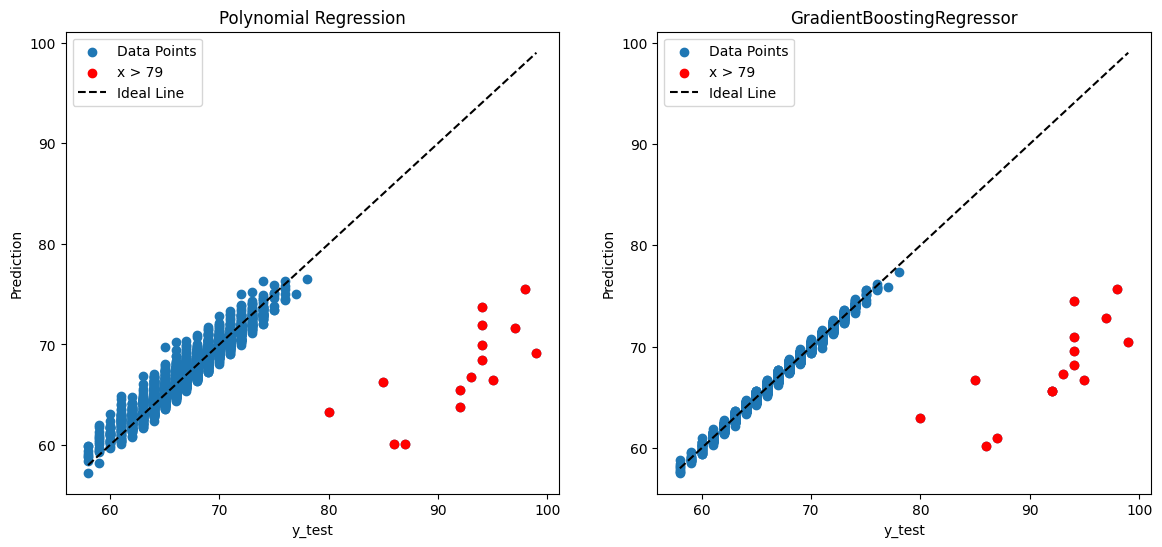

In [209]:
# สร้าง Figure
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, label='Data Points')
highlight = y_test > 79  # เงื่อนไข x > 79
plt.scatter(y_test[highlight], y_pred[highlight], color='red', label='x > 79')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal Line')
plt.xlabel('y_test')
plt.title('Polynomial Regression')
plt.ylabel('Prediction')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, label='Data Points')
highlight = y_test > 79  # เงื่อนไข x > 79
plt.scatter(y_test[highlight], y_test_pred[highlight], color='red', label='x > 79')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal Line')
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.title('GradientBoostingRegressor')
plt.legend()


MAE ของ GradientBoostingRegressor ทำงานได้ดีกว่าเพราะว่า มีการเรียนรู้ Error ก่อนหน้าและเป็น model ที่เป็นต้นไม้ไม่ใช่ หาเส้นที่ดีที่สุด 

แต่ทั้งหมดแล้วก็ยังไม่สามารถแก้ปัญหา Target ในช่วง 79 - 100 ที่ทำนายได้แย่มากได้อยู่ดี เพราะฉะนั้นปัญหานี้ มาจากข้อมูลของ Target ช่วง 79 - 100 มีข้อมูลที่น้อยมากๆ

<Axes: >

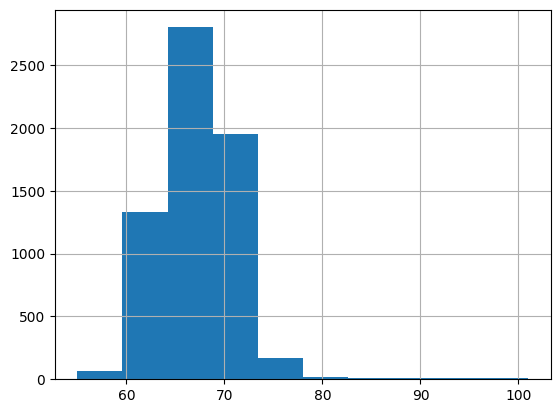

In [210]:
data['Exam_Score'].hist()

พยายามทำให้ model มีประสิทธิภาพมากขึ้นแล้วก็ตาม ใช้ model อื่นดูแล้ว ไม่มีแนวโน้มที่จะ ทำนายในส่วนของตรงนี้ได้เลย ทางแก้ไขก็คืออาจจะต้องเก็บข้อมูลเพิ่มจริงๆ   หรือถ้าเก็บไม่ได้ใช้เทคนิค resample ข้อมูลขึ้นมาใหม่ด้วยวิธีการต่างๆ 

# Comparison of the different models

เปรียบเทียบ Test MAE ทุก model

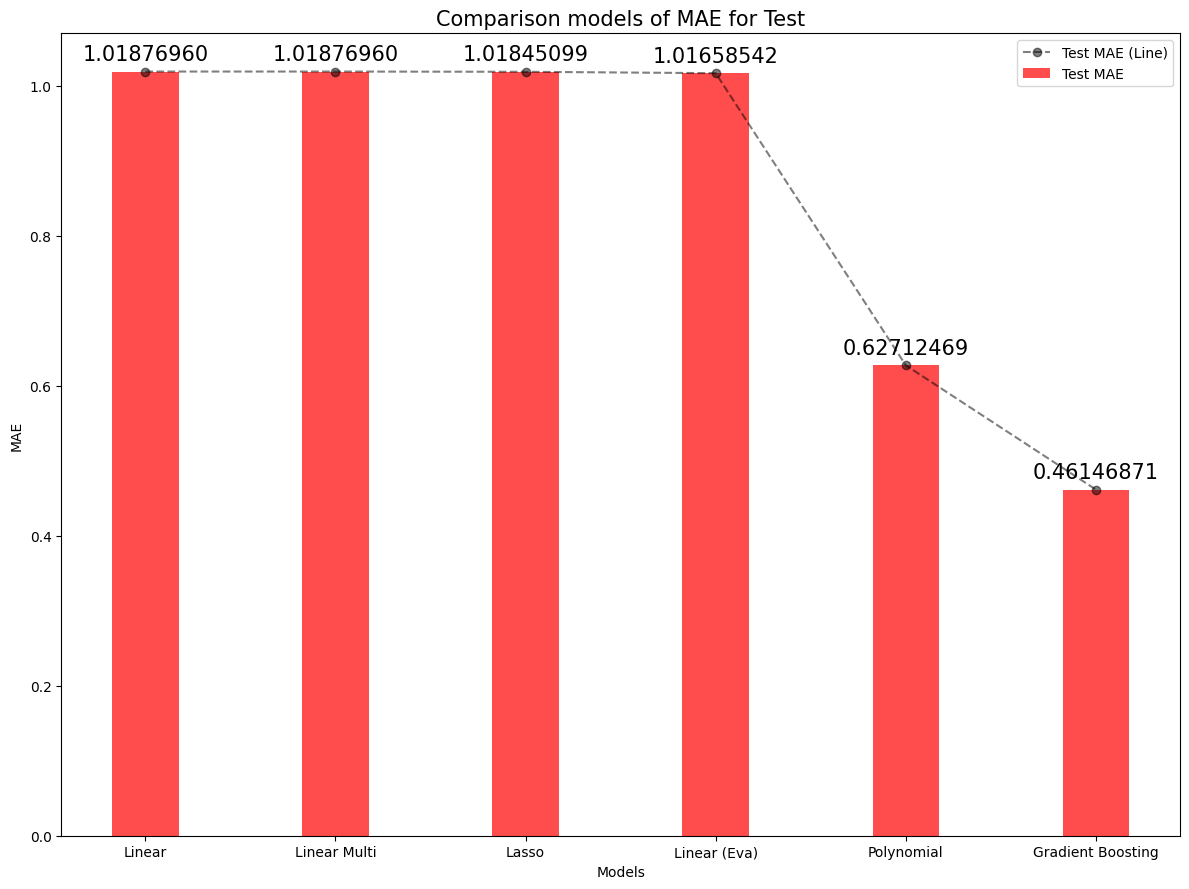

In [211]:
plt.figure(figsize=(12, 9))

# ข้อมูล
models = ['Linear', 'Linear Multi', 'Lasso', 'Linear (Eva)', 'Polynomial', 'Gradient Boosting']
# train_scores = [train_mae_linear, train_mae_linear_mul, train_mae_lasso, train_mae_linear_eva, train_mae_poly, mae_train_gbr]
test_scores = [test_mae_linear, test_mae_linear_mul, test_mae_lasso, test_mae_linear_eva, test_mae_poly, mae_test_gbr]

# Bar width
bar_width = 0.35
x = range(len(models))  # ตำแหน่งแกน X

# Bar Plot
# plt.bar([pos - bar_width / 2 for pos in x], train_scores, width=bar_width, color='blue', alpha=0.7, label='Train MAE')
plt.bar([pos + bar_width / 2 for pos in x], test_scores, width=bar_width, color='red', alpha=0.7, label='Test MAE')

# Line Plot
# plt.plot(x, train_scores, marker='o', color='blue', linestyle='-', label='Train MAE (Line)')
plt.plot([pos + bar_width / 2 for pos in x], test_scores, marker='o', color='black', linestyle='--', label='Test MAE (Line)',alpha=0.5)

# Add labels
for i, test in enumerate(test_scores):
    # plt.text(i - bar_width / 2, train + 0.0001, f'{train:.4f}', ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(i + bar_width / 2, test + 0.01, f'{test:.8f}', ha='center', va='bottom', fontsize=15, color='black')

# Configurations
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison models of MAE for Test', fontsize=15)
plt.xticks([pos + bar_width / 2 for pos in x], models)  # ตั้งค่าแกน X ให้เป็นชื่อโมเดล
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

model ที่ดีที่สุด (ทำให้ MAE น้อยสุด) คือ Gradient Boosting Regression 

# Summary

เป้าหมาย
ลดค่า MAE ในส่วนของ Test Data ให้ต่ำที่สุด

ขั้นตอนการพัฒนาโมเดลและปัญหาที่พบ  
1. Linear Regression    
ปัญหา: เกิด Multicollinearity (X มีความสัมพันธ์กันเอง) ส่งผลให้ Coefficients ไม่เสถียร และโมเดลไม่สามารถจับความสัมพันธ์ที่แท้จริงได้ ทำให้ MAE แย่ลง   
การแก้ไข: ตัด Features ที่ไม่จำเป็นออก ส่งผลให้ Coefficients กลับมาเสถียร   
ปัญหาเพิ่มเติม: โมเดลยังไม่สามารถทำนาย Target ช่วง 79-100 ได้ดี ทำให้ MAE ยังคงสูง

2. LASSO Regression   
วัตถุประสงค์: ตรวจสอบว่าการลด Coefficients ของ Features บางตัวจะช่วยลด MAE หรือไม่   
ผลลัพธ์: LASSO ลด MAE ลงได้จริง เนื่องจากบาง Features ไม่มีความสำคัญมีหลงเหลืออยู่   
พอตัด Features ที่มี Coefficients ใกล้ 0 ออก และตรวจสอบซ้ำด้วย LASSO พบว่าไม่มี Features ไม่สำคัญหลงเหลือเพราะ MAE ไม่ได้ดีขึ้นแล้ว  
ปัญหาเดิม: โมเดลยังคงทำนาย Target ช่วง 79-100 ได้ไม่ดี   

3. Polynomial Regression   
วัตถุประสงค์: เพิ่มความสามารถของโมเดลให้จับความสัมพันธ์ Non-linear   
ผลลัพธ์: Polynomial Degree 2 ให้ MAE ต่ำที่สุด   
ไม่เกิด Overfitting (ตรวจสอบด้วย Cross-validation)   
คะแนน Train > Test ในระดับที่ Make Sense   
และ MAE ดีกว่าทุก model ที่ผ่านมา   
ปัญหาเดิม: โมเดลยังไม่สามารถทำนาย Target ช่วง 79-100 ได้ดี   

4. Gradient Boosting Regressor   
วัตถุประสงค์: ใช้โมเดลที่สามารถปรับปรุงจากข้อมูลที่ทำนายผิดพลาดได้   
ผลลัพธ์: MAE ลดลงอย่างมากเมื่อเทียบกับ Polynomial Regression   
แต่ยังมีปัญหา: Target ช่วง 79-100 มีข้อมูลน้อยมาก ทำให้โมเดลยังไม่สามารถทำนายได้ดี   
ข้อสรุปและแนวทางเพิ่มเติม  
ปัญหาหลัก: ข้อมูล Target ในช่วง 79-100 มีจำนวนน้อย (Data Imbalance)  
แนวทางแก้ไข:   
เก็บข้อมูลเพิ่มเติมในช่วงที่ขาดหาย

จากการพัฒนาโมเดลทั้งหมด พบว่า Gradient Boosting Regressor ให้ค่า MAE ต่ำที่สุดเมื่อเทียบกับโมเดลอื่นๆ อย่างไรก็ตาม ปัญหาการทำนาย Target ในช่วง 79-100   ทำนายได้ไม่ดี เนื่องจากข้อมูลในช่วงนี้มีจำนวนน้อยมาก  
  
แนวทางการแก้ไข: ควรเพิ่มข้อมูลในช่วง 79-100 เพื่อช่วยให้โมเดลเรียนรู้และทำนายได้แม่นยำยิ่งขึ้น   
  
นอกจากนี้ จากการวิเคราะห์พบว่า Attendance และ Hours_Studied เป็นปัจจัยสำคัญที่ส่งผลต่อ Exam_score (Target) มากที่สุด                                       
และช่วยเพิ่มประสิทธิภาพของโมเดลได้อย่างชัดเจน จากค่า Coeffcients และ Feature_importance 